**Ερώτημα 1: Data Preprocessing**

---


Αρχικά γίνεται η εισαγωγή του dataset METABRIC απο το kaggle.com. Το συγκεκριμένο dataset περιέχει κλινικά αλλά και γενετικά δεδομένα μεταλλάξεων και γονιδιακής έκφρασης από ασθενείς με καρκίνο του μαστού. Τα δεδομένα του dataset φαίνονται παρακάτω:

### 📋 Dataset Description

| Name | Type | Description |
|------|------|-------------|
| `patient_id` | object | Patient ID |
| `age_at_diagnosis` | float | Age of the patient at diagnosis time |
| `type_of_breast_surgery` | object | Type of breast surgery: MASTECTOMY or BREAST CONSERVING |
| `cancer_type` | object | General cancer type: Breast Cancer or Breast Sarcoma |
| `cancer_type_detailed` | object | Detailed breast cancer type (e.g., Invasive Ductal, Lobular, etc.) |
| `cellularity` | object | Amount/arrangement of tumor cells after chemotherapy |
| `chemotherapy` | int | Whether patient had chemotherapy (1 = Yes, 0 = No) |
| `pam50_+_claudin-low_subtype` | object | Molecular tumor profile subtype (e.g. Claudin-low) |
| `cohort` | float | Study group (cohort), values from 1 to 5 |
| `er_status_measured_by_ihc` | float | Estrogen receptor status by IHC (positive/negative) |
| `er_status` | object | ER status of cancer cells (positive/negative) |
| `neoplasm_histologic_grade` | int | Tumor grade: 1 (low) to 3 (high) |
| `her2_status_measured_by_snp6` | object | HER2 status via SNP6 sequencing |
| `her2_status` | object | HER2 status (positive/negative) |
| `tumor_other_histologic_subtype` | object | Histologic subtype (e.g. Ductal/NST, Lobular, Mucinous, etc.) |
| `hormone_therapy` | int | Whether the patient had hormone therapy (1 = Yes, 0 = No) |
| `inferred_menopausal_state` | object | Menopausal state (post/pre) |
| `integrative_cluster` | object | Molecular subtype from gene expression (e.g. '4ER+', '5') |
| `primary_tumor_laterality` | object | Left or right breast involved |
| `lymph_nodes_examined_positive` | float | Positive lymph nodes found during surgery |
| `mutation_count` | float | Number of genes with relevant mutations |
| `nottingham_prognostic_index` | float | Prognostic score from tumor size, lymph nodes, and grade |
| `oncotree_code` | object | Clinical cancer type code (OncoTree) |
| `overall_survival_months` | float | Survival time in months after intervention |
| `overall_survival` | object | Whether patient is alive or dead (Target variable) |
| `pr_status` | object | Progesterone receptor status (positive/negative) |
| `radio_therapy` | int | Whether patient had radiotherapy (1 = Yes, 0 = No) |
| `3-gene_classifier_subtype` | object | Gene classifier subtype (e.g., ER+/HER2-) |
| `tumor_size` | float | Size of tumor in mm |
| `tumor_stage` | float | Cancer stage based on TNM classification |
| `death_from_cancer` | int | Whether death was due to cancer (1 = Yes, 0 = No) |


Για τον σκοπό της άσκησης θα χρησιμοποιηθούν τα δεδομένα του μεγεθούς του όγκου του ασθενή, της ηλικίας κατά τον χρόνο διάγνωσης και το αν οι ασθενείς πέθαναν ή όχι από τη νόσο

Αρχικά γίνεται η εισαγωγή του dataset:

In [ ]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("raghadalharbi/breast-cancer-gene-expression-profiles-metabric")

print("Path to dataset files:", path)
files = os.listdir(path)
print("Files downloaded:", files)

Path to dataset files: /kaggle/input/breast-cancer-gene-expression-profiles-metabric
Files downloaded: ['METABRIC_RNA_Mutation.csv']


In [ ]:
import pandas as pd
data = pd.read_csv(os.path.join(path, "METABRIC_RNA_Mutation.csv"))
data.head(5)

/tmp/ipython-input-2-1640224437.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path, "METABRIC_RNA_Mutation.csv"))


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


Έλεγχουμε για την παρουσία κενών τιμών στις στήλες του dataset μας.

In [ ]:
print(data[['death_from_cancer', 'age_at_diagnosis', 'tumor_size']].isnull().sum())

death_from_cancer     1
age_at_diagnosis      0
tumor_size           20
dtype: int64


Εμφανίζεται μία κενή τιμή στη στήλη death_from_cancer και 20 στη στήλη tumor_size, οπότε παρακάτω αφαιρούμε από το dataset αυτές τις γραμμές

In [ ]:
data_clean = data.dropna(subset=['death_from_cancer', 'age_at_diagnosis', 'tumor_size'])

Ελέγχουμε αν έχει γίνει η αφαίρεση των γραμμών με τις κένες τιμές από το dataset μας


In [ ]:
print(data_clean[['death_from_cancer', 'age_at_diagnosis', 'tumor_size']].isnull().sum())

death_from_cancer    0
age_at_diagnosis     0
tumor_size           0
dtype: int64


Δημιουργούμε νέο subset στο οποίο αποθηκευόνται οι τιμές για το αν πέθανε ή οχι κάποιος από καρκίνο σε δυαδική μορφή, όπου 0 -> επιβίωση και 1-> θάνατος από καρκίνο.

Για τους ασθενείς του dataset υπάρχει και η περίπτωση να έχουν πεθάνει από άλλα αίτια, αλλά συμπεριλαμβάνοντας τους στο group επιβίωσης(καθώς δεν θεωρείται ότι πέθαναν από τη νόσο για να μπουν στο group θανάτου από τη νόσο) η μέση ηλικία μεταξύ επιβίωσης και θανάτου δεν εμφάνιζε διαφορές, καθώς φαίνεται ότι ο θάνατος από άλλα αίτια σχετίζεται κατα βάση με την ηλικία.

Έτσι επιλέχθηκε να μην συμπεριληφθούν σε καμία από τις δύο ομάδες και να μη συμμετέχουν στις περαιτέρω αναλύσεις


In [ ]:
# Φιλτράρουμε μόνο Living και Died of Disease
subset = data_clean[data_clean['death_from_cancer'].isin(['Living', 'Died of Disease'])].copy()

# Μετατρέπουμε σε δυαδική
subset['died_of_cancer_bin'] = subset['death_from_cancer'].map({'Living': 0, 'Died of Disease': 1})



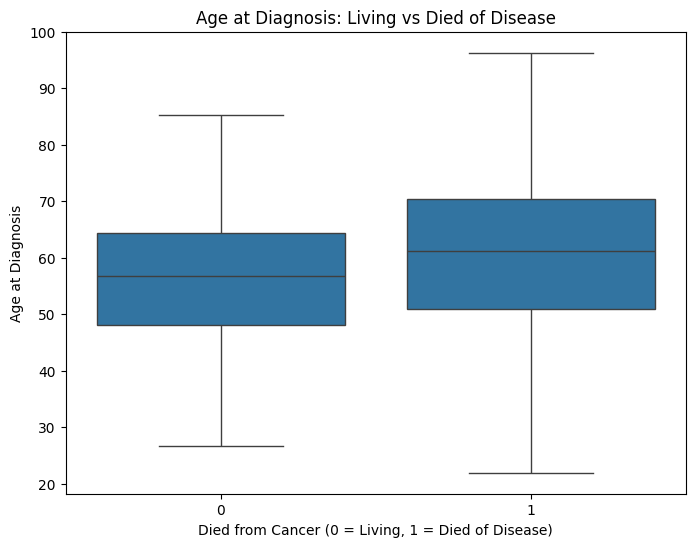

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='died_of_cancer_bin', y='age_at_diagnosis', data=subset)
plt.xlabel('Died from Cancer (0 = Living, 1 = Died of Disease)')
plt.ylabel('Age at Diagnosis')
plt.title('Age at Diagnosis: Living vs Died of Disease')
plt.show()


Βλέπουμε ότι στο group των ασθενών που απεβίωσαν από τη νόσο η ηλικία είναι λίγο πάνω από τα 60, ενώ στο group των ασθενών που επιβίωσαν η αντίστοιχη ηλικία είναι μεταξύ 55-60

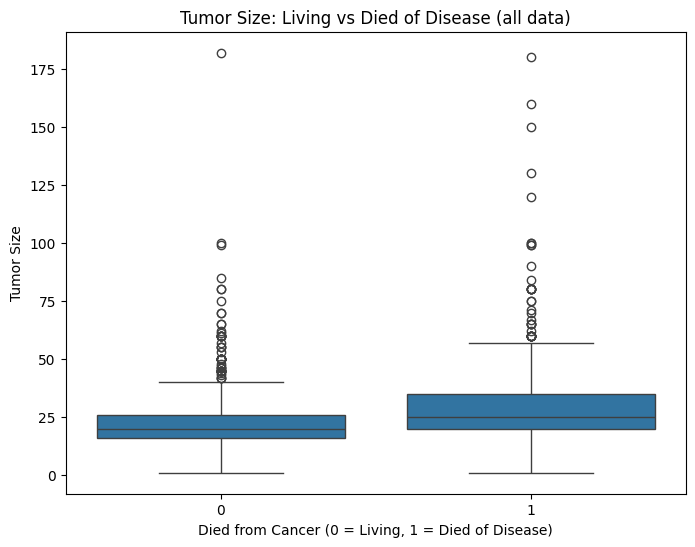

In [ ]:
# Boxplot για όλες τις τιμές του tumor_size (χωρίς φιλτράρισμα)
plt.figure(figsize=(8,6))
sns.boxplot(x='died_of_cancer_bin', y='tumor_size', data=subset)
plt.xlabel('Died from Cancer (0 = Living, 1 = Died of Disease)')
plt.ylabel('Tumor Size')
plt.title('Tumor Size: Living vs Died of Disease (all data)')
plt.show()


Παρατηρούμε πως και στα δύο groups υπάρχουν αρκετά outliers, τα οποία θα φιλτράρουμε παρακάτω

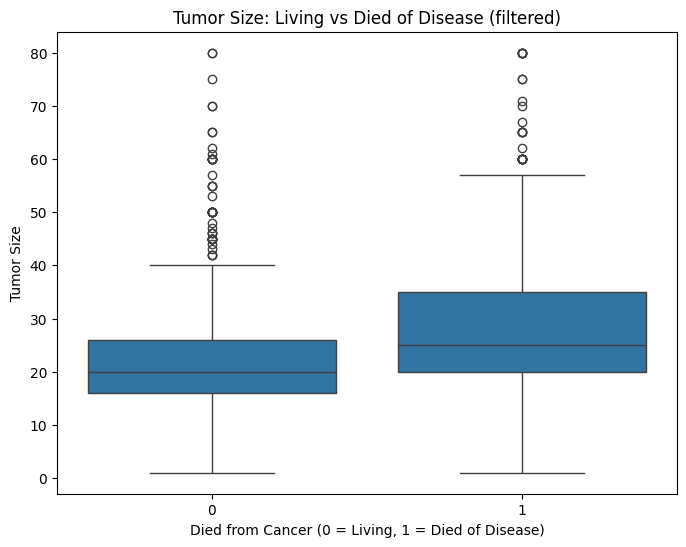

In [ ]:
# Υπολογίζουμε το 99ο ποσοστημόριο του tumor_size
upper_limit = subset['tumor_size'].quantile(0.99)

# Φιλτράρουμε τα δεδομένα κρατώντας μόνο τις τιμές κάτω ή ίσες με το 99ο ποσοστημόριο
subset_filtered = subset[subset['tumor_size'] <= upper_limit]

# Plot για tumor_size με τα φιλτραρισμένα δεδομένα
plt.figure(figsize=(8,6))
sns.boxplot(x='died_of_cancer_bin', y='tumor_size', data=subset_filtered)
plt.xlabel('Died from Cancer (0 = Living, 1 = Died of Disease)')
plt.ylabel('Tumor Size')
plt.title('Tumor Size: Living vs Died of Disease (filtered)')
plt.show()


Δημιουργούμε ένα νέο dataset για να δουλέψουμε με όνομα subset_filtered, στο οποίο οι μόνες στήλες που παραμένουν είναι η ηλικία διάγνωσης, το μέγεθος του όγκου και η στήλη με τις δυαδικές τιμές (επιβίωση / μη επιβίωση)

In [ ]:
# Επιλέγουμε μόνο τις στήλες που θέλουμε να κρατήσουμε
columns_to_keep = ['age_at_diagnosis', 'tumor_size', 'died_of_cancer_bin']
subset_filtered = subset[subset['tumor_size'] <= upper_limit][columns_to_keep].copy()


Παρακάτω κάνουμε Mann-Whitney test για να δούμε αν η ηλικία διάγνωσης της νόσου σχετίζεται στατιστικά με τον θάνατο ή όχι από τη νόσο. Όπως φαίνεται η διαφορά στην ηλικία διάγνωσης μεταξύ των δύο group είναι στατιστικά σημαντική

In [ ]:
from scipy.stats import mannwhitneyu

# Διαχωρίζουμε τις ηλικίες ανά ομάδα
living_ages = subset[subset['died_of_cancer_bin'] == 0]['age_at_diagnosis']
died_ages = subset[subset['died_of_cancer_bin'] == 1]['age_at_diagnosis']

# Εκτέλεση του Mann-Whitney U test
stat, p = mannwhitneyu(living_ages, died_ages, alternative='two-sided')

print(f"Mann-Whitney U test statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Η διαφορά στην ηλικία μεταξύ των ομάδων είναι στατιστικά σημαντική.")
else:
    print("Δεν υπάρχει στατιστικά σημαντική διαφορά στην ηλικία μεταξύ των ομάδων.")


Mann-Whitney U test statistic: 198684.0
P-value: 1.1045261700350938e-09
Η διαφορά στην ηλικία μεταξύ των ομάδων είναι στατιστικά σημαντική.


Παρακάτω κάνουμε Mann-Whitney test για να δούμε αν το μέγεθος του όγκου εμφανίζει διαφορές μεταξύ των δύο group. Όπως φαίνεται η διαφορά μέγεθος του όγκου διαφέρει στατιστικά μεταξύ των δύο group.


In [ ]:
group_living = subset_filtered[subset_filtered['died_of_cancer_bin'] == 0]['tumor_size']
group_died = subset_filtered[subset_filtered['died_of_cancer_bin'] == 1]['tumor_size']

stat, p = mannwhitneyu(group_living, group_died)

print(f'Mann-Whitney U test statistic: {stat}')
print(f'P-value: {p}')

if p < 0.05:
    print("Υπάρχει στατιστικά σημαντική διαφορά στο μέγεθος του όγκου μεταξύ των ομάδων.")
else:
    print("Δεν υπάρχει στατιστικά σημαντική διαφορά στο μέγεθος του όγκου μεταξύ των ομάδων.")


Mann-Whitney U test statistic: 171579.0
P-value: 9.344590234634056e-20
Υπάρχει στατιστικά σημαντική διαφορά στο μέγεθος του όγκου μεταξύ των ομάδων.


Στη συνέχεια ακολουθεί η συσσωμάτωση δεδομένων που είναι ένα βήμα προεπεξεργασίας όπου οι τιμές δύο ή περισσότερων αντικειμένων συνδυάζονται σε ένα ενιαίο αντικείμενο.

In [ ]:
data_filtered = data_clean[data_clean['death_from_cancer'].isin(['Living', 'Died of Disease'])]

agg_mean = data_filtered.groupby('death_from_cancer')[['age_at_diagnosis', 'tumor_size']].mean()

print("Μέσοι όροι ανά ομάδα (Living vs Died of Disease):")
print(agg_mean)


Μέσοι όροι ανά ομάδα (Living vs Died of Disease):
                   age_at_diagnosis  tumor_size
death_from_cancer                              
Died of Disease           60.539433   30.125559
Living                    56.482418   23.319861


In [ ]:
# Ομαδοποίηση και υπολογισμός μέσου όρου, min και max για age_at_diagnosis και tumor_size
agg_all = subset.groupby('died_of_cancer_bin').agg({
    'age_at_diagnosis': ['mean', 'min', 'max'],
    'tumor_size': ['mean', 'min', 'max']
})

print("Aggregated statistics (mean, min, max) by death_from_cancer binary class:")
print(agg_all)


Aggregated statistics (mean, min, max) by death_from_cancer binary class:
                   age_at_diagnosis               tumor_size            
                               mean    min    max       mean  min    max
died_of_cancer_bin                                                      
0                         56.482418  26.72  85.21  23.319861  1.0  182.0
1                         60.539433  21.93  96.29  30.125559  1.0  180.0


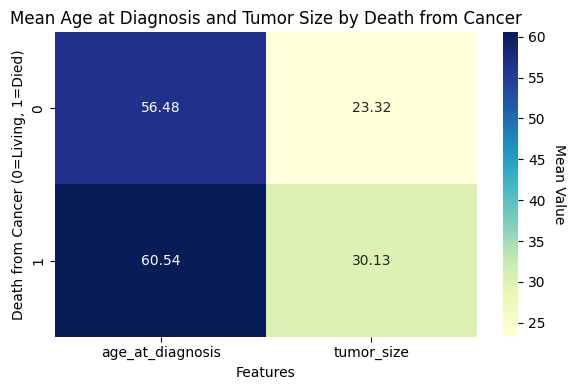

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Υπολογισμός μέσων όρων για τις δύο μεταβλητές ανά ομάδα
agg_mean = subset.groupby('died_of_cancer_bin')[['age_at_diagnosis', 'tumor_size']].mean()

# Δημιουργία heatmap
plt.figure(figsize=(6, 4))
ax = sns.heatmap(agg_mean, annot=True, cmap='YlGnBu', fmt=".2f")

# Προσθήκη τίτλου στο colorbar
colorbar = ax.collections[0].colorbar
colorbar.set_label('Mean Value', rotation=270, labelpad=15)

plt.title('Mean Age at Diagnosis and Tumor Size by Death from Cancer')
plt.xlabel('Features')
plt.ylabel('Death from Cancer (0=Living, 1=Died)')
plt.tight_layout()
plt.show()


Κάνοντας έναν θερμοχάρτη στα δεδομένα μας βλέπουμε ότι:

Για την ηλικία:

Όσοι πέθαναν είχαν κατά μέσο όρο μεγαλύτερη ηλικία κατά τη διάγνωση (περίπου 4 χρόνια μεγαλύτεροι).

Αυτό υποδηλώνει ότι ηλικία είναι πιθανώς προγνωστικός παράγοντας: όσο μεγαλύτερος ο ασθενής, τόσο χειρότερη η πρόγνωση.

Για το μέγεθος του όγκου:

Το μέσο μέγεθος όγκου είναι σημαντικά μεγαλύτερο σε όσους πέθαναν (30.13 mm vs 23.32 mm).

Αυτό ενισχύει το συμπέρασμα που είχαμε και από το boxplot, ότι ενδεχομένως ισχύει ότι μεγαλύτερος όγκος → μεγαλύτερος κίνδυνος.

Επομένως, βλέπουμε ότι το μέγεθος του όγκου και η ηλικία σχετίζονται με την επιβίωση οπότε θα μπορούσαν να χρησιμοποιηθούν ως παράγοντες πρόβλεψης της επιβίωσης.




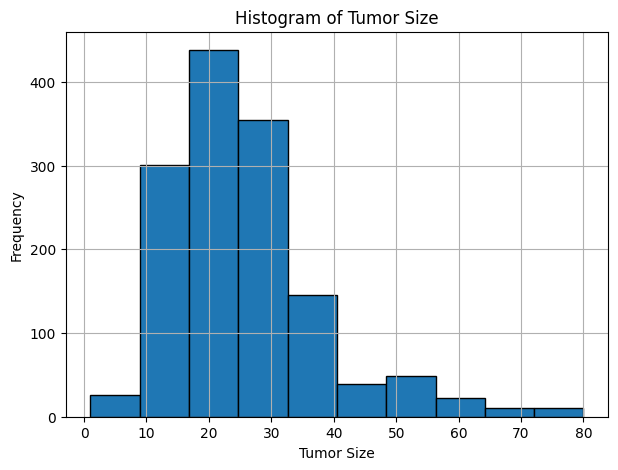

In [ ]:
plt.figure(figsize=(7, 5))
subset_filtered['tumor_size'].hist(bins=10, edgecolor='black')
plt.title('Histogram of Tumor Size')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


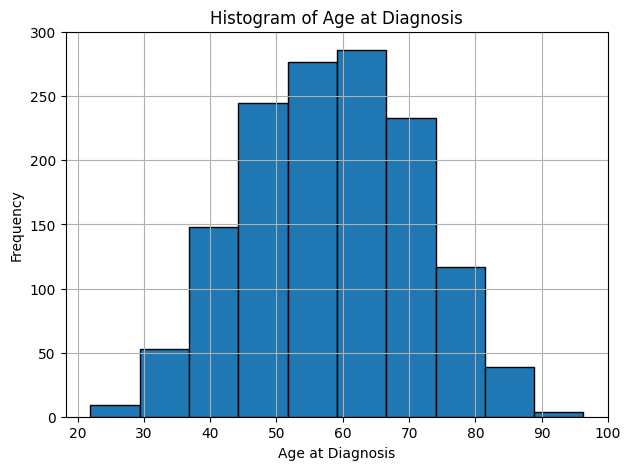

In [ ]:
plt.figure(figsize=(7, 5))
subset['age_at_diagnosis'].hist(bins=10, edgecolor='black')
plt.title('Histogram of Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Παρακάτω γίνεται η κατηγοριοποίηση των χαρακτηριστικών.

Για την ηλικία δημιουργούνται 3 κατηγορίες (Young, Middle, Old) και 3 κατηγορίες για το μέγεθος του όγκου (Small,Medium,Large)


In [ ]:
# Κατηγοριοποίηση ηλικίας σε 3 quantiles με ετικέτες
subset_filtered['age_cat'] = pd.qcut(subset['age_at_diagnosis'], q=3, labels=['Young', 'Middle', 'Old'])

# Κατηγοριοποίηση tumor size σε 3 quantiles με ετικέτες
subset_filtered['tumor_size_cat'] = pd.qcut(subset['tumor_size'], q=3, labels=['Small', 'Medium', 'Large'])


print(subset_filtered[['age_at_diagnosis', 'age_cat', 'tumor_size', 'tumor_size_cat']].head(10))


    age_at_diagnosis age_cat  tumor_size tumor_size_cat
0              75.65     Old        22.0         Medium
1              43.19   Young        10.0          Small
2              48.87   Young        15.0          Small
3              47.68   Young        25.0         Medium
4              76.97     Old        40.0          Large
5              78.77     Old        31.0          Large
6              56.45  Middle        10.0          Small
9              84.22     Old        28.0          Large
10             85.49     Old        22.0         Medium
11             70.91     Old        21.0         Medium


Στη συνέχεια γίνεται η καταμέτρηση των ασθενών σε κάθε μία από τις 3 κατηγορίες.


In [ ]:
print(subset_filtered['age_cat'].value_counts())
print(subset_filtered['tumor_size_cat'].value_counts())


age_cat
Old       467
Young     466
Middle    463
Name: count, dtype: int64
tumor_size_cat
Small     626
Large     446
Medium    324
Name: count, dtype: int64


Standardization και PCA


Στη συνέχεια το standardization στα χαρακτηριστικά age_at_diagnosis και tumor_size που επιλέγονται ως οι δύο μεταβλητές για πρόβλεψη, ενώ το target είναι αν πέθανε κάποιος από τη νόσο.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Επιλογή χαρακτηριστικών και target
features = ['age_at_diagnosis', 'tumor_size']
X = subset[features]
y = subset['died_of_cancer_bin']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print(X_scaled_df.head())


   age_at_diagnosis  tumor_size
0          1.385932   -0.268632
1         -1.200509   -1.019029
2         -0.747922   -0.706364
3         -0.842742   -0.081033
4          1.491111    0.856962


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

# Επιλογή χαρακτηριστικών και target
features = ['age_at_diagnosis', 'tumor_size']
X = subset[features]
y = subset['died_of_cancer_bin']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Δημιουργία DataFrame για scaled δεδομένα
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print(X_scaled_df.head())

# PCA με 2 κύρια components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Δημιουργία DataFrame με τα 2 components και target
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['died_of_cancer_bin'] = y.values




   age_at_diagnosis  tumor_size
0          1.385932   -0.268632
1         -1.200509   -1.019029
2         -0.747922   -0.706364
3         -0.842742   -0.081033
4          1.491111    0.856962


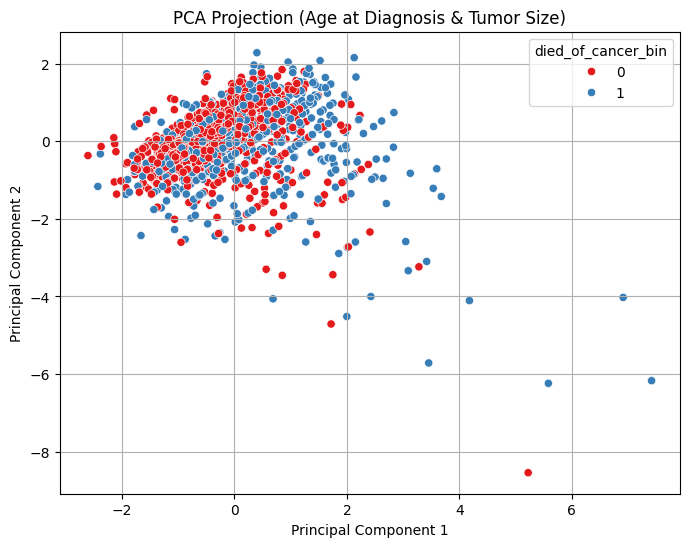

In [ ]:
# Οπτικοποίηση
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='died_of_cancer_bin', palette='Set1')
plt.title('PCA Projection (Age at Diagnosis & Tumor Size)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Με την οπτικόποιηση για το PCA βλέπουμε ότι το PCA αποτυπώνει κάποια διαφοροποίηση μεταξύ των group, αλλά όχι τόσο ισχυρή ώστε να υπάρχει καθαρός διαχωρισμός.

In [ ]:
print("Explained variance ratio of each PC:")
print(pca.explained_variance_ratio_)

print("\nTotal variance explained by the first 2 PCs:")
print(sum(pca.explained_variance_ratio_))


Explained variance ratio of each PC:
[0.52085144 0.47914856]

Total variance explained by the first 2 PCs:
1.0


Από τα παραπάνω βλέπουμε ότι το PC1 εξηγεί ~52% της συνολικής διακύμανσης, ενώ το PC2 εξηγεί ~48% της διακύμανσης. Επομένως, οι δύο συνιστώσες εξηγούν 100% της συνολικής διασποράς.

**Ερώτημα 2: Εξερεύνηση Δεδομένων (Data Exploration)**

---


In [ ]:
from pandas.api.types import is_numeric_dtype

# Χρησιμοποιούμε το φιλτραρισμένο subset
df = subset_filtered

# Ορίζουμε ποιες στήλες μας ενδιαφέρουν
columns_of_interest = ['age_at_diagnosis', 'tumor_size']

# Εμφάνιση βασικών στατιστικών για τις συγκεκριμένες στήλες
for col in columns_of_interest:
    if col in df.columns and is_numeric_dtype(df[col]):
        print(f'{col}:')
        print(f'\t Mean = {df[col].mean():.2f}')
        print(f'\t Standard deviation = {df[col].std():.2f}')
        print(f'\t Minimum = {df[col].min():.2f}')
        print(f'\t Maximum = {df[col].max():.2f}')


age_at_diagnosis:
	 Mean = 58.31
	 Standard deviation = 12.50
	 Minimum = 21.93
	 Maximum = 96.29
tumor_size:
	 Mean = 25.30
	 Standard deviation = 12.44
	 Minimum = 1.00
	 Maximum = 80.00


**Ηλικία κατά τη διάγνωση**

---



Μέση τιμή (Mean): 58.31 ετών
 Οι περισσότεροι ασθενείς διαγνώστηκαν γύρω στα 58.

Τυπική απόκλιση (Std): 12.50
Υπάρχει αρκετή διασπορά. Ηλικίες απέχουν αρκετά από τον μέσο όρο.

Ελάχιστη ηλικία: 21.93 ετών
Υπάρχουν περιπτώσεις πολύ νεαρών ασθενών.

Μέγιστη ηλικία: 96.29 ετών
Ηλικίες καλύπτουν όλο το φάσμα ενηλίκων μέχρι τα πολύ γεράματα.


**Μέγεθος όγκου**

---


Μέση τιμή: 25.30

Τυπική απόκλιση: 12.44
Παρόμοια διακύμανση με την ηλικία, σχεδόν ίδια std.

Ελάχιστο μέγεθος: 1.00
Πολύ μικροί όγκοι καταγράφηκαν.

Μέγιστο μέγεθος: 80.00
Υπάρχουν και πολύ μεγάλοι όγκοι, outliers.

In [ ]:
subset_filtered['died_of_cancer_bin'].map({0: 'Survived', 1: 'Died'}).value_counts()


,count
died_of_cancer_bin,
Survived,790
Died,606


Παραπάνω βλέπουμε το πλήθος των ατόμων σε κάθε κατηγορία.



Ακολουθεί η συνοπτική περιγραφή όλων των χαρακτηριστικών του dataset μας, όπως μέσος όρος, ελάχιστη, μέγιστη τιμή, η τυπική απόκλιση.

In [ ]:
subset_filtered.describe(include='all')


,age_at_diagnosis,tumor_size,died_of_cancer_bin,age_cat,tumor_size_cat
count,1396.000000,1396.000000,1396.000000,1396,1396
unique,NaN,NaN,NaN,3,3
top,NaN,NaN,NaN,Old,Small
freq,NaN,NaN,NaN,467,626
mean,58.307142,25.304756,0.434097,NaN,NaN
std,12.503600,12.440287,0.495815,NaN,NaN
min,21.930000,1.000000,0.000000,NaN,NaN
25%,49.365000,17.000000,0.000000,NaN,NaN
50%,58.555000,22.000000,0.000000,NaN,NaN
75%,67.620000,30.000000,1.000000,NaN,NaN


In [ ]:
print('Covariance matrix (subset_filtered):')
numeric_data = subset_filtered.select_dtypes(include='number')
print(numeric_data.cov())


Covariance matrix (subset_filtered):
                    age_at_diagnosis  tumor_size  died_of_cancer_bin
age_at_diagnosis          156.340013   13.172770            0.987815
tumor_size                 13.172770  154.760740            1.391246
died_of_cancer_bin          0.987815    1.391246            0.245833


Ο πίνακας δείχνει πόσο συνδέονται γραμμικά τα ζεύγη μεταβλητών.

Διαγώνιος:
Είναι οι διακυμάνσεις των ίδιων των μεταβλητών:

var(age_at_diagnosis) ≈ 156.34

var(tumor_size) ≈ 154.76

var(died_of_cancer_bin) ≈ 0.25 (λογικό, είναι δυαδική)

Εκτός διαγωνίου:
age_at_diagnosis & tumor_size → 13.17: Έχουν θετική συσχέτιση, αλλά μέτρια.

age_at_diagnosis & died_of_cancer_bin → 0.99: Υπάρχει ισχυρή θετική γραμμική συσχέτιση (όσο μεγαλύτερη η ηλικία, τόσο πιθανότερος ο θάνατος από καρκίνο).

tumor_size & died_of_cancer_bin → 1.39: Πιο ισχυρή γραμμική συσχέτιση απ’ ό,τι με την ηλικία.

In [ ]:
print('Correlation:')
numeric_data.corr()

Correlation:


,age_at_diagnosis,tumor_size,died_of_cancer_bin
age_at_diagnosis,1.000000,0.084686,0.159338
tumor_size,0.084686,1.000000,0.225555
died_of_cancer_bin,0.159338,0.225555,1.000000


Ακολουθεί ένα boxplot για τα δύο χαρακτηριστικά:

Ηλικία διάγνωσης:

Εμφανίζονται κάποια outliers όσον αφορά την ηλικία καθώς έχουμε μια παρατήρηση μεγάλης ηλικίας (κοντά στα 100) αλλά και μία νεαρής (λίγο μετά τα 20)

Μέγεθος όγκου:

Παρατηρούνται αρκετά outliers κυρίως μεγαλύτερου μεγέθους, τα οποία όμως θα παραμείνουν στο dataset καθώς εντάσσονται στα πλάισια της βιολογικής ποικιλομορφίας που μπορεί να παρατηρηθεί.

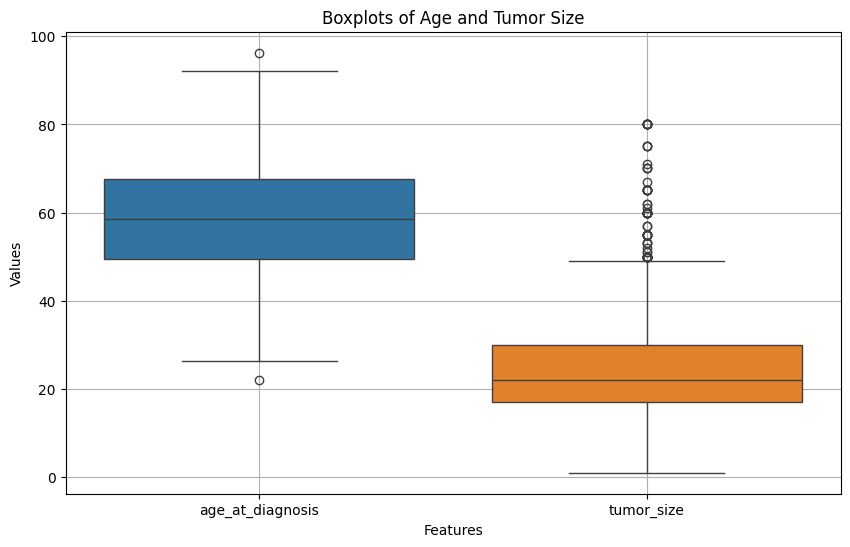

In [ ]:
# Κρατάμε μόνο τις αριθμητικές στήλες, εκτός από τη died_of_cancer_bin
numeric_cols = subset_filtered.select_dtypes(include='number').drop(columns=['died_of_cancer_bin'])

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_cols)
plt.title('Boxplots of Age and Tumor Size')
plt.xlabel('Features')
plt.ylabel('Values')
plt.grid(True)
plt.show()


Ακολουθεί ένα scatterplot που απεικονίζει τη σχέση μεταξύ μεγέθους όγκου και ηλικίας διαγνώσης, στο οποίο όμως δεν φαίνεται κάποια σαφής συσχέτιση μεταξύ τους.

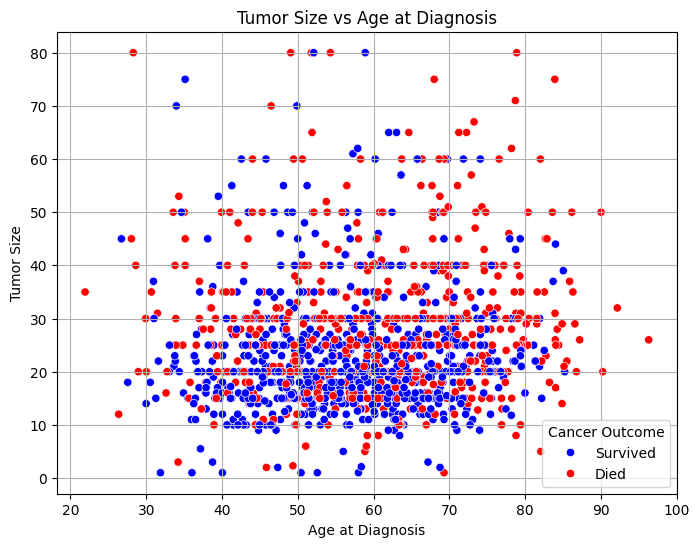

In [ ]:
plot_data = subset_filtered.copy()
plot_data['cancer_outcome'] = plot_data['died_of_cancer_bin'].map({0: 'Survived', 1: 'Died'})

# Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_data,
    x='age_at_diagnosis',
    y='tumor_size',
    hue='cancer_outcome',
    palette={'Survived': 'blue', 'Died': 'red'}
)

plt.title('Tumor Size vs Age at Diagnosis')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Tumor Size')
plt.grid(True)
plt.legend(title='Cancer Outcome')
plt.show()

Μέγεθος όγκου και επιβίωση:

Πολλοί από όσους πέθαναν (κόκκινα) είχαν μεγαλύτερους όγκους (π.χ. πάνω από 30-40).

Όσοι επιβίωσαν (μπλε) έχουν περισσότερο συγκέντρωση σε όγκους μικρότερου μεγέθους, κυρίως 10–30.

Αυτό υποστηρίζει τη γνωστή ιατρική υπόθεση: όσο νωρίτερα και μικρότερος ο όγκος, τόσο καλύτερη η πρόγνωση.

Ηλικία και έκβαση:

Δεν φαίνεται πολύ καθαρή συσχέτιση ανάμεσα στην ηλικία και το αν πέθανε κάποιος.

Υπάρχουν και νέοι και ηλικιωμένοι που πέθαναν ή επέζησαν.

Ίσως σε μεγαλύτερες ηλικίες να παρατηρείται ελαφρώς αυξημένη θνησιμότητα (π.χ. άνω των 70), αλλά δεν είναι τόσο έντονο όσο με το μέγεθος του όγκου.

Πυκνότητα δεδομένων:

Η μεγαλύτερη συγκέντρωση ασθενών είναι μεταξύ ηλικίας 45–75 και όγκων 10–30.

Εκεί μέσα υπάρχουν και επιζώντες και θανόντες, αλλά το χρώμα γέρνει προς μπλε, υποδηλώνοντας σχετικά καλή πρόγνωση σ’ αυτό το εύρος.

 Συμπερασματικά:
 Το μέγεθος του όγκου φαίνεται να είναι πολύ πιο καθοριστικό για την επιβίωση απ’ ό,τι η ηλικία.

 Αν κάποιος είχε μεγάλο όγκο (>40), οι πιθανότητες θανάτου αυξάνονται αισθητά.

 Η ηλικία πιθανόν επηρεάζει, αλλά όχι τόσο εμφανώς.


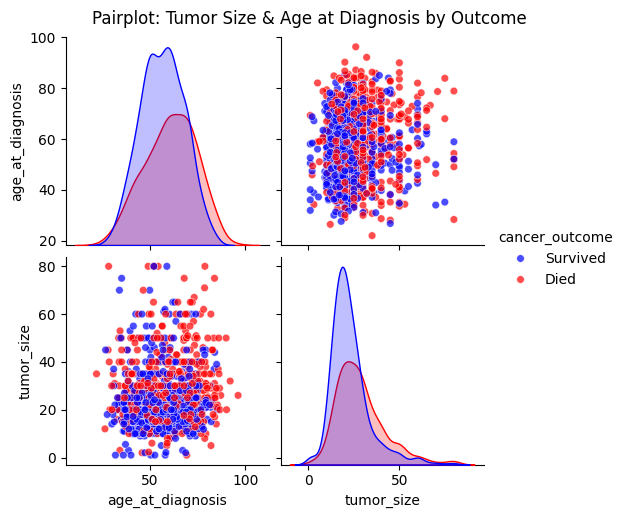

In [ ]:
# Δημιουργούμε αντίγραφο και μετατρέπουμε το target σε περιγραφική κατηγορία
pairplot_data = subset_filtered.copy()
pairplot_data['cancer_outcome'] = pairplot_data['died_of_cancer_bin'].map({0: 'Survived', 1: 'Died'})

# Επιλογή μόνο των αριθμητικών + την κατηγορία
selected_features = ['age_at_diagnosis', 'tumor_size', 'cancer_outcome']

# Pairplot
sns.pairplot(pairplot_data[selected_features], hue='cancer_outcome', palette={'Survived': 'blue', 'Died': 'red'},
             plot_kws={'s': 30, 'alpha': 0.7})
plt.suptitle('Pairplot: Tumor Size & Age at Diagnosis by Outcome', y=1.02)
plt.show()

Οι διαγώνιοι πίνακες (πάνω αριστερά & κάτω δεξιά) είναι μονοδιάστατες κατανομές (KDE) για κάθε χαρακτηριστικό, διαχωρισμένες ανά outcome.

**Ηλικία διάγνωσης:**


Η μπλε καμπύλη (επιζώντες) έχει αιχμή γύρω στα 65 έτη.

Η κόκκινη (θανόντες) έχει πιο επίπεδη κατανομή, δηλαδή οι θάνατοι είναι πιο διάσπαρτοι στις ηλικίες.

Συμπερασματικά: Δεν παρατηρείται ισχυρή συσχέτιση ανάμεσα σε ηλικία και έκβαση, αλλά φαίνεται πως οι επιζώντες συγκεντρώνονται περισσότερο σε ηλικίες 60–70.

**Μέγεθος όγκου**


Οι επιζώντες (μπλε) έχουν πιο στενή κατανομή, με αιχμή γύρω στα 20–25.

Οι θανόντες (κόκκινο) έχουν πιο φλατ κατανομή και επεκτείνονται προς μεγαλύτερα μεγέθη.

Εδώ φαίνεται καθαρά πως μεγαλύτεροι όγκοι σχετίζονται με αυξημένη πιθανότητα θανάτου.

Εκτός διαγωνίου (scatterplots):
Κάτω αριστερά (tumor_size vs age_at_diagnosis)
Είναι παρόμοιο με το προηγούμενο scatterplot.

Φαίνεται ότι:

Όσοι πέθαναν (κόκκινο) έχουν μεγαλύτερη διασπορά στα μεγέθη.

Οι περισσότεροι επιζώντες (μπλε) συγκεντρώνονται σε μέτριο μέγεθος όγκου και μέση ηλικία.

Δεν υπάρχει ισχυρή οπτική συσχέτιση μεταξύ ηλικίας και έκβασης.

Πάνω δεξιά (age_at_diagnosis vs tumor_size – ίδιο με το προηγούμενο αλλά αντεστραμμένο)

Συμπέρασμα από το pairplot:

Η συσχέτιση του μεγέθους του όγκου είναι ισχυρή – όσο μεγαλύτερος, τόσο αυξάνεται η πιθανότητα θανάτου.
Η συσχέτιση με την ηλικία διάγνωσης είναι πιο αδύναμη – ίσως μια ήπια τάση ότι οι μεγαλύτεροι έχουν ελαφρώς χειρότερη έκβαση, αλλά όχι καθαρή.

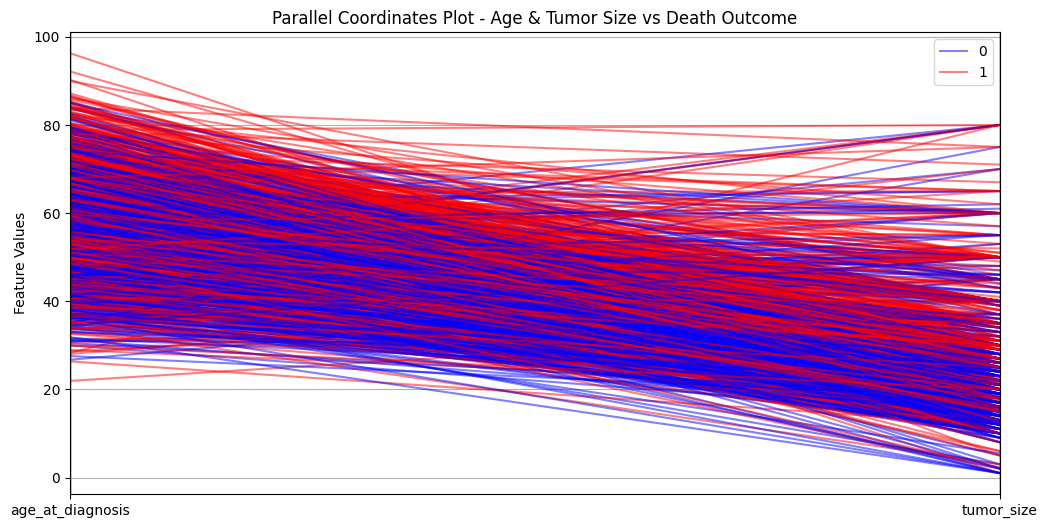

In [ ]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Φτιάχνουμε νέο DataFrame μόνο με αριθμητικά δεδομένα + target
plot_df = subset_filtered[['age_at_diagnosis', 'tumor_size', 'died_of_cancer_bin']].copy()

# Μετατρέπουμε το target σε string για να γίνει αποδεκτό από τη συνάρτηση
plot_df['died_of_cancer_bin'] = plot_df['died_of_cancer_bin'].astype(str)

# Δημιουργία parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(plot_df, class_column='died_of_cancer_bin', color=['blue', 'red'], alpha=0.5)
plt.title('Parallel Coordinates Plot - Age & Tumor Size vs Death Outcome')
plt.ylabel('Feature Values')
plt.grid(True)
plt.show()


Σχέση Όγκου με Θνησιμότητα:

Οι κόκκινες γραμμές (θάνατοι) τείνουν να καταλήγουν σε υψηλότερες τιμές του tumor_size, δηλαδή είχαν μεγαλύτερους όγκους.

Οι μπλε γραμμές (επιζώντες) συγκεντρώνονται σε πιο χαμηλές τιμές όγκου.

Αυτό υποστηρίζει ότι μεγαλύτερος όγκος σχετίζεται με χειρότερη πρόγνωση.

Ηλικία:

Οι τιμές ηλικίας είναι πιο ομοιόμορφα κατανεμημένες και για τις δύο κατηγορίες.

Δεν υπάρχει σαφής διαχωρισμός ανάμεσα σε κόκκινες και μπλε γραμμές στην αρχή (στον άξονα της ηλικίας).

Αυτό επιβεβαιώνει ότι η ηλικία δεν είναι τόσο καθοριστικός παράγοντας για το outcome, τουλάχιστον όχι όσο το μέγεθος του όγκου.

Κατεύθυνση γραμμών:

Πολλές κόκκινες γραμμές “ανεβαίνουν” ή “μένουν ψηλά” στον δεύτερο άξονα (όγκος), ενώ οι μπλε κατεβαίνουν χαμηλότερα.

Μπορεί να θεωρηθεί ως οπτικός διαχωρισμός βάσει tumor_size, όχι όμως με απόλυτη ακρίβεια (υπάρχουν επικαλύψεις).

**Συμπέρασμα:**

Επιρροή στην έκβαση

Μέγεθος όγκου ->	Ισχυρή – υψηλές τιμές συσχετίζονται με θάνατο.

Ηλικία διάγνωσης ->	Αδύναμη – δεν φαίνεται ισχυρή διαφοροποίηση.

**Ερώτημα 2 - Clustering**

---




Αρχικά γίνεται η κανονικοποίηση των δεδομένων

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Επιλογή χαρακτηριστικών για scaling
features = ['age_at_diagnosis', 'tumor_size']
X = subset_filtered[features].values

# Standardization (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print(X_scaled_df.head())


   age_at_diagnosis  tumor_size
0          1.387526   -0.265745
1         -1.209456   -1.230698
2         -0.755024   -0.828634
3         -0.850231   -0.024506
4          1.493134    1.181686


Ακολουθεί ο αλγόριθμός K-means για τη συσταδοποίηση των παρατηρήσεων.

Ο K-Means clustering είναι ένας αλγόριθμος ανώτερης μη επιβλεπόμενης μάθησης που ομαδοποιεί δεδομένα σε k ομάδες, ελαχιστοποιώντας την απόσταση κάθε σημείου από το κοντινότερο centroid.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# K και αρχικοί centroids
k = 3
np.random.seed(42)
n_samples = X_scaled.shape[0]
initial_centroid_idx = np.random.choice(n_samples, k, replace=False)
centroids = X_scaled[initial_centroid_idx]

# Εκτύπωση αρχικών centroids
print("Initial Centroids:")
for i, c in enumerate(centroids):
    print(f"Centroid {i}:", np.round(c, 3))

# Επανάληψη clustering
prev_assignments = np.zeros(n_samples)
for iteration in range(10):
    print(f"\n--- Iteration {iteration + 1} ---")

    # Φάση 1: Ανάθεση σε κοντινότερο centroid
    distances = np.linalg.norm(X_scaled[:, np.newaxis] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)

    # Εκτύπωση clusters
    for j in range(k):
        cluster_points = np.where(cluster_assignments == j)[0]
        print(f"Cluster {j}: {len(cluster_points)} points")

    # Φάση 2: Υπολογισμός νέων centroids
    new_centroids = np.array([
        X_scaled[cluster_assignments == j].mean(axis=0) if len(X_scaled[cluster_assignments == j]) > 0 else centroids[j]
        for j in range(k)
    ])

    # Εκτύπωση νέων centroids
    print("Updated Centroids:")
    for i, c in enumerate(new_centroids):
        print(f"Centroid {i}:", np.round(c, 3))

    # Έλεγχος για σύγκλιση
    if np.all(cluster_assignments == prev_assignments):
        print("\nNo change in cluster assignment. Converged.")
        break
    else:
        centroids = new_centroids
        prev_assignments = cluster_assignments


Initial Centroids:
Centroid 0: [-0.03  -0.427]
Centroid 1: [ 1.055 -0.427]
Centroid 2: [-0.486  0.378]

--- Iteration 1 ---
Cluster 0: 514 points
Cluster 1: 395 points
Cluster 2: 487 points
Updated Centroids:
Centroid 0: [-0.278 -0.657]
Centroid 1: [ 1.163 -0.099]
Centroid 2: [-0.65   0.774]

--- Iteration 2 ---
Cluster 0: 613 points
Cluster 1: 437 points
Cluster 2: 346 points
Updated Centroids:
Centroid 0: [-0.439 -0.637]
Centroid 1: [1.112 0.037]
Centroid 2: [-0.628  1.082]

--- Iteration 3 ---
Cluster 0: 648 points
Cluster 1: 465 points
Cluster 2: 283 points
Updated Centroids:
Centroid 0: [-0.541 -0.59 ]
Centroid 1: [ 1.058 -0.002]
Centroid 2: [-0.499  1.354]

--- Iteration 4 ---
Cluster 0: 674 points
Cluster 1: 493 points
Cluster 2: 229 points
Updated Centroids:
Centroid 0: [-0.63  -0.507]
Centroid 1: [ 1.008 -0.073]
Centroid 2: [-0.315  1.649]

--- Iteration 5 ---
Cluster 0: 670 points
Cluster 1: 518 points
Cluster 2: 208 points
Updated Centroids:
Centroid 0: [-0.676 -0.463]
Centr

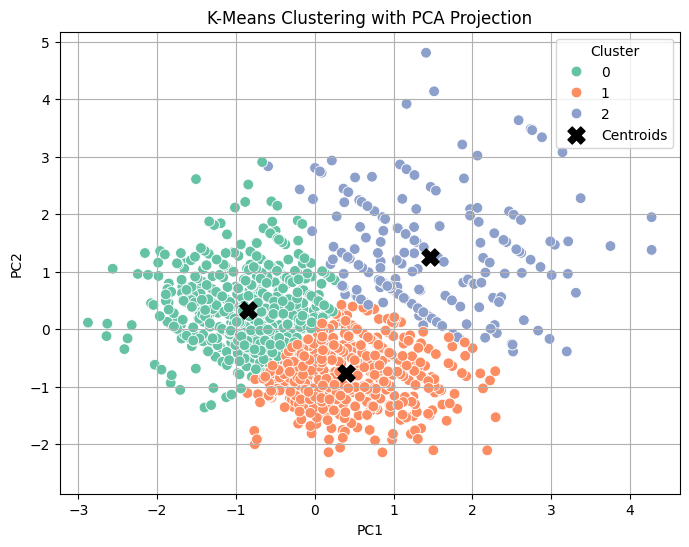

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA για μείωση σε 2 διαστάσεις
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_assignments, palette='Set2', s=60)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c='black', marker='X', s=150, label='Centroids')
plt.title('K-Means Clustering with PCA Projection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Η παραπάνω εικόνα απεικονίζει το αποτέλεσμα της εφαρμογής του αλγορίθμου ομαδοποίησης K-means στο σύνολο δεδομένων μας, αφού τα δεδομένα έχουν πρώτα προβληθεί σε δύο διαστάσεις μέσω Ανάλυσης Κύριων Συνιστωσών (PCA). Οι δύο άξονες του διαγράμματος αντιστοιχούν στις δύο πρώτες κύριες συνιστώσες (PC1 και PC2), οι οποίες συγκεντρώνουν το μεγαλύτερο ποσοστό πληροφορίας από τα αρχικά χαρακτηριστικά του συνόλου.

Κάθε σημείο στο διάγραμμα αντιπροσωπεύει μία παρατήρηση και έχει χρωματιστεί σύμφωνα με τη συστάδα στην οποία κατατάχθηκε από τον αλγόριθμο K-means. Οι τρεις συστάδες αποδίδονται με διαφορετικά χρώματα, ενώ τα μεγάλα μαύρα "Χ" συμβολίζουν τα κεντροειδή των συστάδων, δηλαδή τα σημεία γύρω από τα οποία ομαδοποιήθηκαν οι παρατηρήσεις.

Όπως φαίνεται από το διάγραμμα, ο αλγόριθμος κατάφερε να εντοπίσει τρεις ευδιάκριτες ομάδες, οι οποίες όμως εμφανίζουν αρκετή επικάλυψη μεταξύ τους.

Η χρήση της PCA πριν από την ομαδοποίηση επιτρέπει την αποτελεσματική απεικόνιση πολυδιάστατων δεδομένων σε δισδιάστατο χώρο, ενισχύοντας την κατανόηση της δομής των συστάδων και διευκολύνοντας την ερμηνεία των αποτελεσμάτων.

Στο παραγόμενο γράφημα παρουσιάζονται τα εξής:

Τα σημεία αντιστοιχούν σε ασθενείς και έχουν χρωματιστεί ανάλογα με το cluster στο οποίο κατατάχθηκαν.

Οι μαύροι σταυροί συμβολίζουν τα κεντροειδή (centroids) κάθε ομάδας, δηλαδή το μέσο σημείο κάθε cluster.

Παρατηρείται σαφής διαχωρισμός των δεδομένων σε τρεις διακριτές ομάδες (clusters), που υποδηλώνει πιθανές υποομάδες ασθενών με παρόμοια κλινικά προφίλ.

Πιθανή Βιολογική ή Κλινική Ερμηνεία των Clusters

Παρόλο που ο αλγόριθμος είναι μη επιβλεπόμενος (unsupervised), μπορεί να γίνουν κάποιες υποθέσεις για το τι εκφράζει κάθε ομάδα:

Cluster 0: Ασθενείς με μικρότερο όγκο αλλά μεγαλύτερη ηλικία (ή αντίστροφα, ανάλογα με το φορτίο των κύριων συνιστωσών).

Cluster 1: Ασθενείς με μεσαίες τιμές και στα δύο χαρακτηριστικά — μπορεί να εκφράζει "τυπική" ομάδα.

Cluster 2: Πιο νεαροί ασθενείς με μεγαλύτερους όγκους (π.χ. πιο επιθετικές μορφές).


Συμπεράσματα

Ο συνδυασμός κανονικοποίησης, K-Means clustering και PCA αποκάλυψε την ύπαρξη τριών υποομάδων ασθενών.

Η οπτικοποίηση δείχνει ότι τα clusters είναι διακριτά και παρουσιάζουν εσωτερική συνοχή.

Το αποτέλεσμα μπορεί να αξιοποιηθεί για περαιτέρω διερεύνηση, όπως:

1)ανάλυση επιβίωσης ανά cluster

2)αντιστοίχιση με τύπους όγκου ή γονιδιακές εκφράσεις



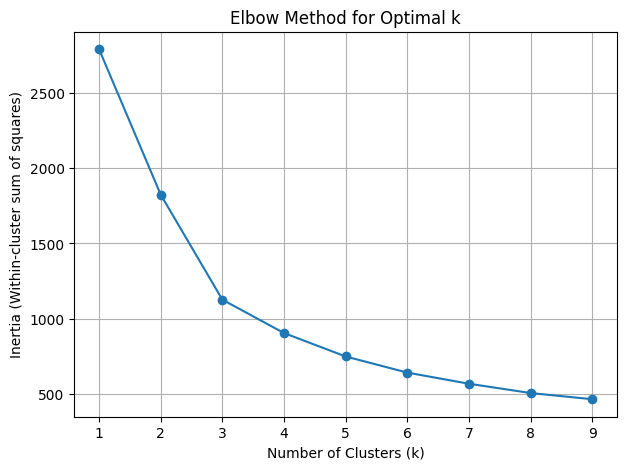

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Επιλογή χαρακτηριστικών
features = ['age_at_diagnosis', 'tumor_size']
X = subset_filtered[features].values

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Υπολογισμός inertia για διαφορετικές τιμές k
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Σχεδίαση Elbow plot
plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True)
plt.show()


Για τον προσδιορισμό του ιδανικού αριθμού ομάδων (clusters), χρησιμοποιήθηκε η μέθοδος του αγκώνα (Elbow Method), σύμφωνα με την οποία υπολογίζεται η μεταβολή του inertia για διαφορετικές τιμές του
𝑘
k.

Όπως φαίνεται στο Σχήμα X (τοποθετείς αριθμό σχήματος), παρατηρείται μια έντονη πτώση στο inertia μέχρι και την τιμή k=3, μετά την οποία οι μειώσεις γίνονται σταδιακά μικρότερες.

Το σημείο αυτό υποδηλώνει ότι το k=3 είναι ο βέλτιστος αριθμός clusters για την ομαδοποίηση των δεδομένων, καθώς εξασφαλίζει καλή ισορροπία μεταξύ ακρίβειας και απλότητας του μοντέλου.

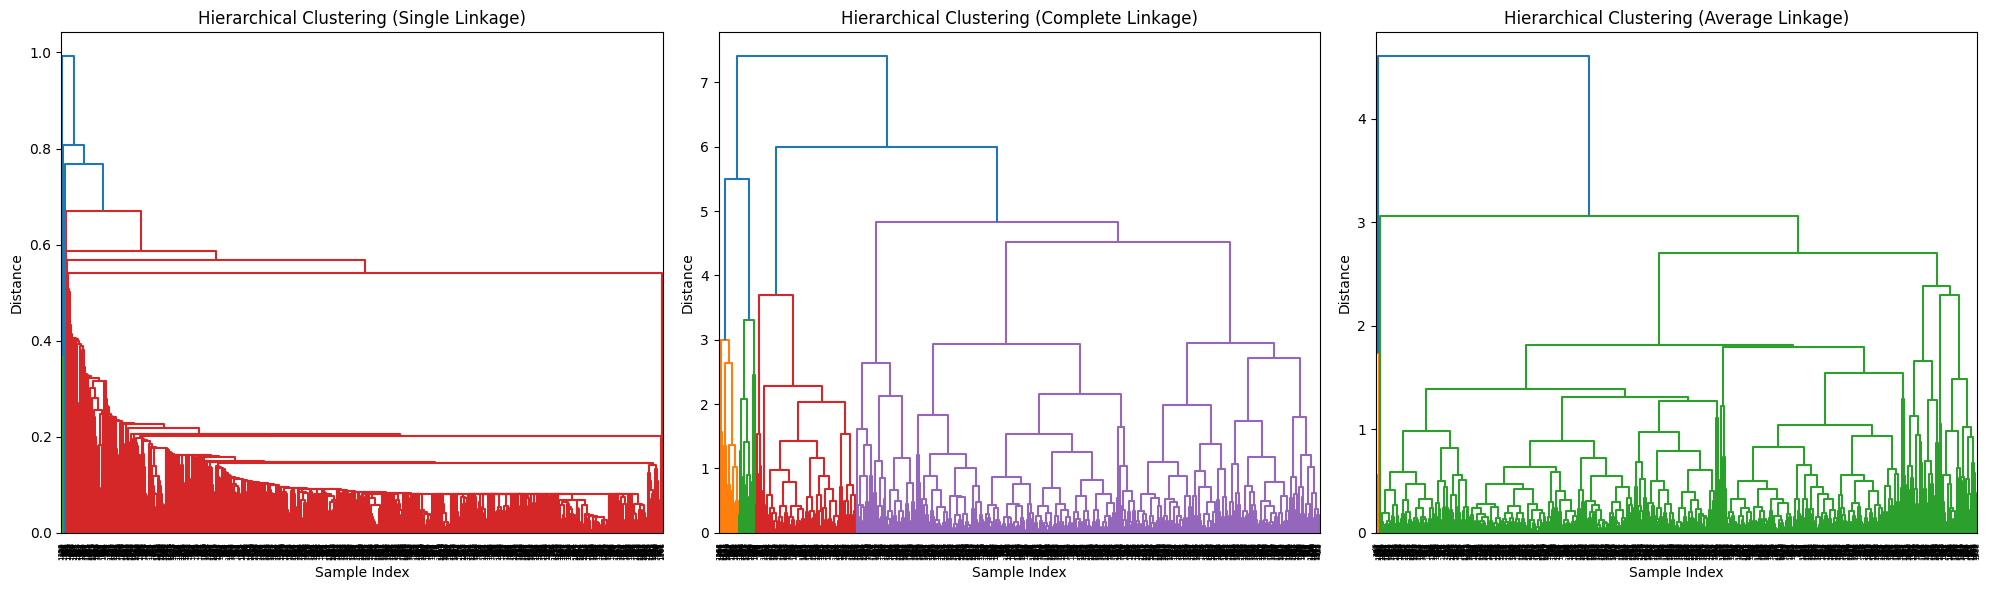

In [ ]:
import scipy.cluster.hierarchy as sch


methods = ['single', 'complete', 'average']

plt.figure(figsize=(20, 6))
for i, method in enumerate(methods):
    plt.subplot(1, 3, i+1)
    dend = sch.dendrogram(sch.linkage(X_scaled, method=method))
    plt.title(f'Hierarchical Clustering ({method.title()} Linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

plt.tight_layout()
plt.show()


Για την κατανόηση της εσωτερικής δομής των δεδομένων, εφαρμόστηκε ιεραρχική ομαδοποίηση με τρεις διαφορετικές μεθόδους σύνδεσης: single, complete και average linkage.

Όπως παρατηρείται στα δενδρογράμματα, η μέθοδος complete linkage δημιουργεί πιο καθαρά διαχωρισμένες ομάδες, ενώ η single linkage οδηγεί σε φαινόμενο "αλυσίδωσης", όπου πολλά δείγματα ενώνονται πρόωρα. Η average linkage προσφέρει έναν ενδιάμεσο συμβιβασμό.

Η ανάλυση αυτή βοηθά στον οπτικό εντοπισμό του αριθμού των φυσικών ομάδων, καθώς και στην κατανόηση της σχέσης ανάμεσα στα δείγματα.

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Επιλογή linkage method (π.χ. 'average')
linkage_matrix = sch.linkage(X_scaled, method='average')

# Κόβουμε το dendrogram για να πάρουμε 3 clusters
clusters = fcluster(linkage_matrix, 3, criterion='maxclust')

clusters_series = pd.Series(clusters)


print(clusters_series.value_counts())


3    1385
1       9
2       2
Name: count, dtype: int64


Αν και ορίστηκε αριθμός 3 clusters στην ιεραρχική ομαδοποίηση με average linkage, το αποτέλεσμα εμφάνισε έντονη ανισορροπία με την πλειοψηφία των δειγμάτων να καταλήγουν σε ένα μόνο cluster. Αυτό δείχνει ότι η μέθοδος αυτή δεν οδήγησε σε ικανοποιητικό διαχωρισμό των παρατηρήσεων. Θα μπορούσε να εξεταστεί εναλλακτικά η χρήση διαφορετικής linkage μεθόδου ή η κοπή του δενδρογράμματος με βάση το ύψος (απόσταση)

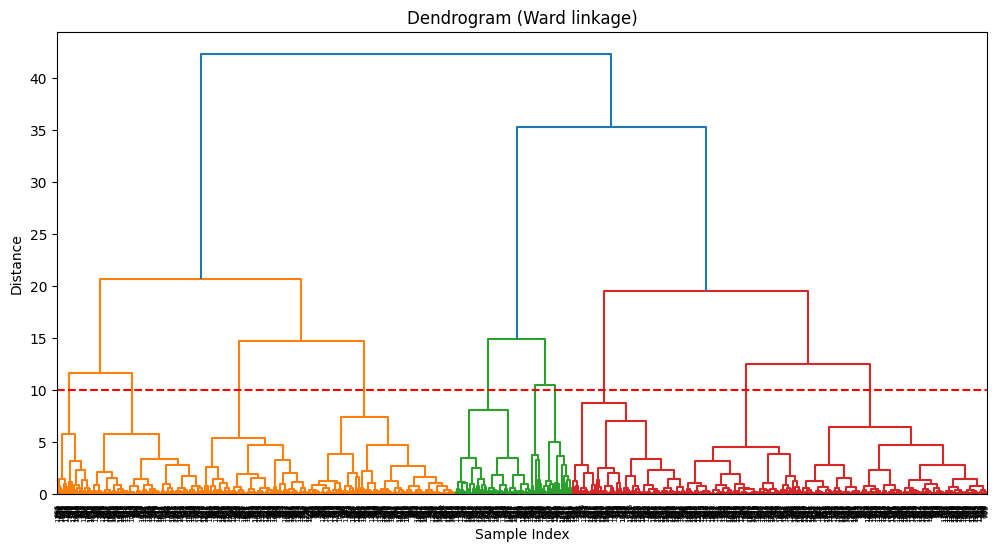

Κατανομή δειγμάτων ανά cluster:
3    622
1    599
2    175
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster

# 1. Επιλογή χαρακτηριστικών
features = ['age_at_diagnosis', 'tumor_size']
X = subset_filtered[features].values

# 2. Κανονικοποίηση
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Ιεραρχική ομαδοποίηση με ward linkage
linkage_matrix = sch.linkage(X_scaled, method='ward')

# 4. Dendrogram για οπτική επισκόπηση
plt.figure(figsize=(12, 6))
dend = sch.dendrogram(linkage_matrix)
plt.axhline(y=10, color='r', linestyle='--')  # ρυθμιζόμενο όριο
plt.title('Dendrogram (Ward linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# 5. Κοπή δενδρογράμματος σε 3 clusters
clusters = fcluster(linkage_matrix, 3, criterion='maxclust')

# 6. Ανάλυση των clusters
clusters_series = pd.Series(clusters)
print("Κατανομή δειγμάτων ανά cluster:")
print(clusters_series.value_counts())


Χρησιμοποιήθηκε η ιεραρχική ομαδοποίηση με τη μέθοδο συνδέσμου Ward, η οποία στοχεύει στη δημιουργία ομάδων που ελαχιστοποιούν την εσωτερική διασπορά. Ο καθορισμός του αριθμού των clusters έγινε με το κριτήριο "maxclust" για
k=3. Η κατανομή των δειγμάτων ανά ομάδα ήταν η εξής:

Cluster 1: 599 δείγματα

Cluster 2: 175 δείγματα

Cluster 3: 622 δείγματα

Η σχετικά ισορροπημένη κατανομή υποδηλώνει ότι υπάρχουν τρεις διακριτές ομάδες στο σύνολο δεδομένων με βάση την ηλικία διάγνωσης και το μέγεθος όγκου. Η μέθοδος Ward φαίνεται να προσφέρει σταθερό και ουσιαστικό διαχωρισμό, σε αντίθεση με άλλες τεχνικές συνδέσμου όπου ένα cluster κυριαρχούσε.

Για την οπτική αποτύπωση των αποτελεσμάτων της ιεραρχικής ομαδοποίησης με τη μέθοδο Ward, εφαρμόστηκε Ανάλυση Κύριων Συνιστωσών (PCA) ώστε να μειωθούν οι διαστάσεις του dataset σε 2. Στο παρακάτω διάγραμμα απεικονίζονται οι παρατηρήσεις χρωματισμένες ανά ομάδα, όπως αυτές προέκυψαν από την ομαδοποίηση. Παρατηρείται σχετικός διαχωρισμός μεταξύ των ομάδων, γεγονός που ενισχύει την εγκυρότητα του αποτελέσματος.

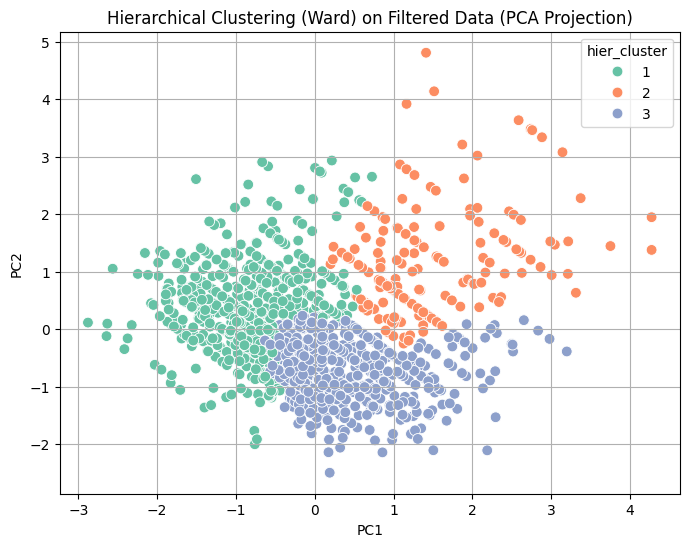

In [ ]:
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Δημιουργία clusters με ward linkage
linkage_matrix = sch.linkage(X_scaled, method='ward')
clusters = fcluster(linkage_matrix, 3, criterion='maxclust')

# Αποθήκευση στο DataFrame
subset_filtered['hier_cluster'] = clusters

# PCA για οπτικοποίηση σε 2 διαστάσεις
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot με χρωματισμούς ανά cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=subset_filtered['hier_cluster'], palette='Set2', s=60)
plt.title('Hierarchical Clustering (Ward) on Filtered Data (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


Οπτικοποίηση αποτελεσμάτων ιεραρχικού clustering

Για την καλύτερη κατανόηση της κατανομής των δειγμάτων στους 3 τελικούς συσταδοποιημένους πληθυσμούς, εφαρμόστηκε Ανάλυση Κύριων Συνιστωσών (Principal Component Analysis - PCA) ώστε να μειωθούν τα χαρακτηριστικά σε δύο διαστάσεις. Το παρακάτω διάγραμμα απεικονίζει τα δείγματα στον νέο δισδιάστατο χώρο, με χρωματική διάκριση των συστάδων που προέκυψαν από το ιεραρχικό clustering (μέθοδος Ward).

Όπως φαίνεται, τα clusters παρουσιάζουν ικανοποιητικό διαχωρισμό στον χώρο των κύριων συνιστωσών. Αυτό υποδηλώνει ότι τα χαρακτηριστικά ηλικία διάγνωσης και μέγεθος όγκου περιέχουν πληροφορία που επιτρέπει την ομαδοποίηση των δειγμάτων με βάση παρόμοια προφίλ.

Η Cluster 1 περιλαμβάνει μεγάλο αριθμό δειγμάτων και φαίνεται να εντοπίζεται σε συγκεκριμένη περιοχή του χώρου.

Η Cluster 2 ξεχωρίζει καθαρά από τις υπόλοιπες, κάτι που υποδηλώνει ότι περιέχει παρατηρήσεις με αρκετά διαφορετικά χαρακτηριστικά.

Η Cluster 3 επικαλύπτεται μερικώς με τις άλλες δύο, αλλά εξακολουθεί να διατηρεί διακριτά όρια.

Η απεικόνιση αυτή ενισχύει την εγκυρότητα των αποτελεσμάτων της συσταδοποίησης και επιβεβαιώνει ότι υπάρχει υποκείμενη δομή στα δεδομένα που σχετίζεται με τις μεταβλητές που χρησιμοποιήθηκαν.

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=5)
db.fit(X_scaled)

labels = db.labels_
subset_filtered['dbscan_cluster'] = labels


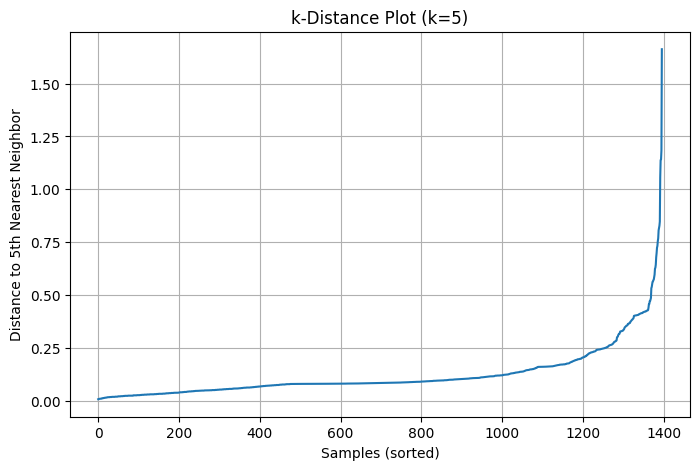

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt


k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)


distances = np.sort(distances[:, k-1])


plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title(f'k-Distance Plot (k={k})')
plt.xlabel('Samples (sorted)')
plt.ylabel(f'Distance to {k}th Nearest Neighbor')
plt.grid(True)
plt.show()


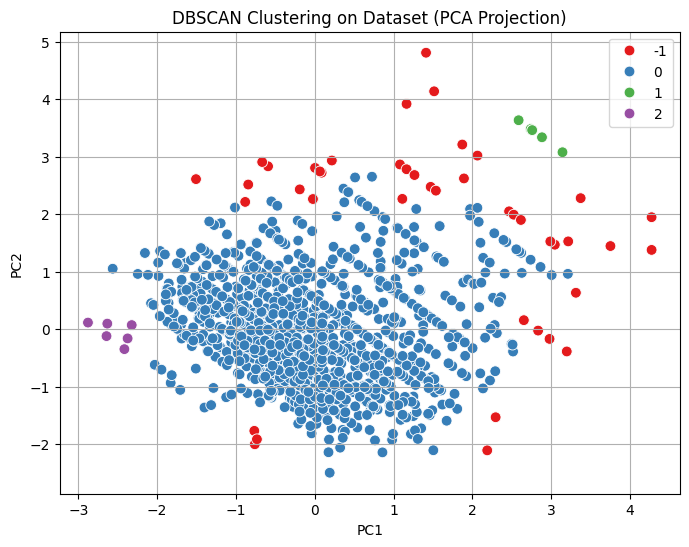

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns


features = ['age_at_diagnosis', 'tumor_size']
X = subset_filtered[features].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DBSCAN
db = DBSCAN(eps=0.38, min_samples=5)
db.fit(X_scaled)
labels = db.labels_

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set1', s=60)
plt.title('DBSCAN Clustering on Dataset (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


Με χρήση του DBSCAN clustering και κατάλληλη επιλογή παραμέτρου eps=0.38 (βάσει του k-distance plot), το μοντέλο κατάφερε να διαχωρίσει τα δεδομένα σε 3 πυκνές ομάδες, ενώ χαρακτήρισε επίσης κάποια δείγματα ως θόρυβο (label = -1). Αυτό δείχνει την ικανότητα του DBSCAN να αναγνωρίζει πυκνές δομές σε αντίθεση με μεθόδους όπως k-means ή hierarchical clustering που προϋποθέτουν σφαιρική κατανομή ή προκαθορισμένο αριθμό clusters.

In [ ]:
import numpy as np
import pandas as pd

labels = subset_filtered['dbscan_cluster']

# Πλήθος clusters (εκτός από noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Αριθμός clusters: {n_clusters}")
print(f"Αριθμός θορύβου (noise points): {n_noise}")

# Μέγεθος κάθε cluster
print("\nΜέγεθος κάθε cluster:")
print(labels.value_counts())

# Συσχέτιση με τον θάνατο από καρκίνο
print("\nCross-tabulation clusters vs died_of_cancer_bin:")
print(pd.crosstab(subset_filtered['dbscan_cluster'], subset_filtered['died_of_cancer_bin']))


Αριθμός clusters: 3
Αριθμός θορύβου (noise points): 8

Μέγεθος κάθε cluster:
dbscan_cluster
 0    1382
-1       8
 1       6
Name: count, dtype: int64

Cross-tabulation clusters vs died_of_cancer_bin:
died_of_cancer_bin    0    1
dbscan_cluster              
-1                    2    6
 0                  786  596
 1                    2    4


| Cluster     | Επιζώντες (0) | Θάνατοι (1) | Ποσοστό Θανάτων |
|-------------|----------------|--------------|-------------------|
| Cluster 0   | 786            | 596          | ~43.1%            |
| Cluster 1   | 2              | 4            | 66.7%             |
| Noise (-1)  | 2              | 6            | 75.0%             |

Τα μικρά clusters και τα noise points φαίνεται να έχουν υψηλότερο ποσοστό θανάτου από καρκίνο σε σύγκριση με το κύριο cluster, γεγονός που μπορεί να υποδεικνύει υποομάδες ασθενών με αυξημένο κίνδυνο, οι οποίοι διαφοροποιούνται ως προς τα χαρακτηριστικά (π.χ. μέγεθος όγκου και ηλικία διάγνωσης).

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Επιλογή χαρακτηριστικών
features = ['age_at_diagnosis', 'tumor_size']
X = subset_filtered[features].values

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ορισμός περιοχών παραμέτρων προς δοκιμή
eps_values = np.arange(0.3, 1.2, 0.1)
min_samples_values = [3, 5, 7]
results = []

# Αναζήτηση βέλτιστων παραμέτρων
for eps in eps_values:
    for min_pts in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_pts)
        labels = db.fit_predict(X_scaled)

        # Υπολογισμός μόνο αν υπάρχουν τουλάχιστον 2 clusters
        if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
            score = silhouette_score(X_scaled, labels)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            results.append((round(eps,2), min_pts, round(score, 3), n_clusters))
        else:
            results.append((round(eps,2), min_pts, -1, 0))

# Δημιουργία πίνακα με τα αποτελέσματα
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'silhouette', 'n_clusters'])
print(results_df.sort_values(by='silhouette', ascending=False))


    eps  min_samples  silhouette  n_clusters
26  1.1            7       0.640           1
14  0.7            7       0.608           1
22  1.0            5       0.606           1
23  1.0            7       0.606           1
17  0.8            7       0.605           1
19  0.9            5       0.604           1
18  0.9            3       0.604           2
20  0.9            7       0.604           1
13  0.7            5       0.599           2
11  0.6            7       0.595           1
16  0.8            5       0.587           2
15  0.8            3       0.587           3
10  0.6            5       0.574           2
9   0.6            3       0.568           2
12  0.7            3       0.549           3
8   0.5            7       0.543           1
7   0.5            5       0.523           2
4   0.4            5       0.437           3
5   0.4            7       0.419           2
2   0.3            7       0.260           3
6   0.5            3       0.172           3
3   0.4   

Το καλύτερο silhouette score με περισσότερα από 1 cluster είναι:
eps = 0.8, min_samples = 3 → silhouette = 0.587, n_clusters = 3

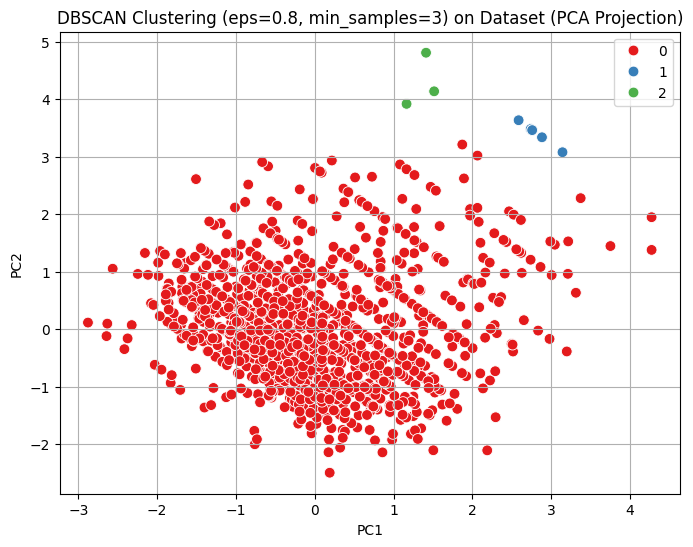

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Ξανατρέχουμε DBSCAN με τις βέλτιστες παραμέτρους
db = DBSCAN(eps=0.8, min_samples=3)
labels_best = db.fit_predict(X_scaled)

# Αποθηκεύουμε τα αποτελέσματα στο subset_filtered
subset_filtered['dbscan_cluster'] = labels_best

# PCA για 2D απεικόνιση
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Οπτικοποίηση
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_best, palette='Set1', s=60)
plt.title('DBSCAN Clustering (eps=0.8, min_samples=3) on Dataset (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


Για τον αλγόριθμο DBSCAN επιλέχθηκαν ως βέλτιστες παράμετροι eps=0.8 και min_samples=3, με βάση την ανάλυση του silhouette score. Παρόλο που ο αλγόριθμος εντόπισε 3 clusters, η κατανομή των δειγμάτων ήταν πολύ άνιση: το ένα cluster περιλάμβανε την πλειοψηφία των ασθενών, ενώ τα υπόλοιπα δύο περιείχαν ελάχιστα δείγματα.

Αυτό υποδεικνύει ότι ο DBSCAN κατάφερε να διαχωρίσει μόνο μια ουσιαστική ομάδα, ενώ τα υπόλοιπα clusters πιθανόν να αντιστοιχούν σε ακραίες περιπτώσεις ή θόρυβο. Αν και η προσέγγιση παρουσιάζει υψηλό silhouette score, το αποτέλεσμα δεν είναι ιδιαίτερα χρήσιμο για ανάλυση υπο-ομάδων στον πληθυσμό.

Εναλλακτικά, ο DBSCAN με πιο αυστηρές παραμέτρους (π.χ. eps=0.6) μπορεί να εντοπίσει πιο συνεκτικά clusters, αλλά και πάλι η κατανομή δεν είναι ομοιόμορφη. Γενικά, ο DBSCAN φαίνεται λιγότερο κατάλληλος για το συγκεκριμένο dataset σε σύγκριση με ιεραρχική ή K-Means ομαδοποίηση.

In [ ]:
subset_filtered['dbscan_cluster'].value_counts()


,count
dbscan_cluster,
0,1387
1,6
2,3


In [ ]:
subset_filtered['dbscan_cluster_cleaned'] = subset_filtered['dbscan_cluster'].apply(
    lambda x: x if x == 0 else -1
)


Στην παρακάτω απεικόνιση, παρουσιάζεται το αποτέλεσμα του DBSCAN αφού διατηρήθηκε μόνο το κύριο cluster (σε μπλε χρώμα), ενώ όλα τα υπόλοιπα σημεία (outliers ή μικρά clusters) σημειώνονται με κόκκινο. Αυτό αποσκοπεί στην καθαρότερη αναπαράσταση της πυκνότερης περιοχής ενδιαφέροντος του συνόλου δεδομένων.

Το clustering με DBSCAN δείχνει ότι οι περισσότεροι ασθενείς συγκεντρώνονται σε έναν κεντρικό, πυκνό πληθυσμό (cluster 0), ενώ ένα μικρό ποσοστό κατατάσσεται ως outliers. Αυτή η πληροφορία είναι χρήσιμη για τον εντοπισμό ακραίων περιπτώσεων ή πιθανών υποομάδων που αποκλίνουν σημαντικά από τη βασική κατανομή.

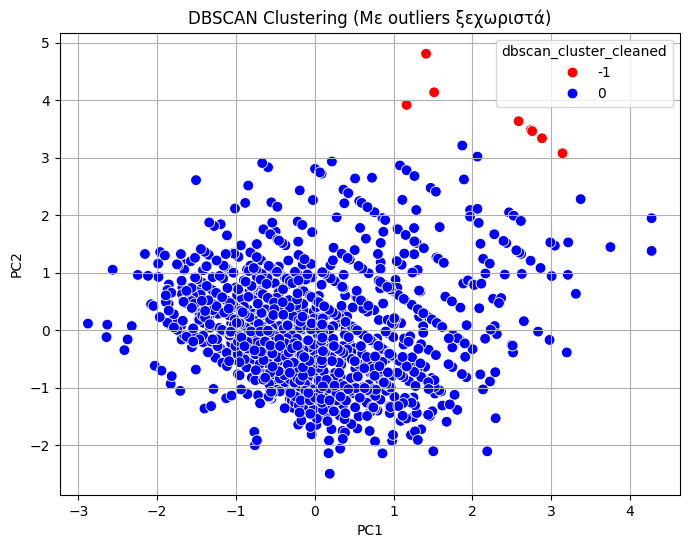

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],
                hue=subset_filtered['dbscan_cluster_cleaned'],
                palette={0: 'blue', -1: 'red'},
                s=60)
plt.title('DBSCAN Clustering (Με outliers ξεχωριστά)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


Στην παραπάνω απεικόνιση παρουσιάζονται τα αποτελέσματα του DBSCAN clustering αφού κρατήθηκε μόνο το κύριο, πυκνό cluster (σε μπλε), ενώ όλα τα υπόλοιπα σημεία (που ανήκουν σε μικρά clusters ή θεωρούνται outliers από τον αλγόριθμο) σημειώνονται με κόκκινο. Η προβολή των δεδομένων έγινε με PCA ώστε να επιτρέπεται η δισδιάστατη απεικόνιση των δύο κύριων συνιστωσών.

Όπως φαίνεται, η πλειοψηφία των δειγμάτων συγκεντρώνεται σε ένα ενιαίο σύνολο, ενώ ένα πολύ μικρό ποσοστό αποκλίνει από το κύριο μοτίβο. Αυτό μπορεί να είναι ενδεικτικό ιδιαίτερων περιπτώσεων, που ενδέχεται να έχουν κλινική σημασία ή να υποδηλώνουν σφάλματα καταγραφής.

In [ ]:
from sklearn.metrics import adjusted_rand_score

true_labels = subset_filtered['died_of_cancer_bin'].astype('category').cat.codes
labels_final = subset_filtered['dbscan_cluster_cleaned']

ari_dbscan = adjusted_rand_score(true_labels, labels_final)

print("Adjusted Rand Index (DBSCAN):", ari_dbscan)
print("Number of clusters found (excluding noise):", len(set(labels_final)) - (1 if -1 in labels_final else 0))
print("Number of noise points:", list(labels_final).count(-1))


Adjusted Rand Index (DBSCAN): 0.0008206927959645324
Number of clusters found (excluding noise): 2
Number of noise points: 9


Το ARI 0.0008 είναι σχεδόν μηδενικό, δηλαδή το clustering του DBSCAN δεν ταιριάζει καλά με τις πραγματικές κλάσεις (died_of_cancer_bin).

Υπάρχουν 2 clusters (εκτός από τον θόρυβο).

9 σημεία χαρακτηρίστηκαν ως θόρυβος (noise).

Ο αλγόριθμος DBSCAN με τις τωρινές παραμέτρους δεν κατάφερε να βρει ομάδες που να διαχωρίζονται καλά βάσει της ετικέτας (ζωντανός/πέθανε). Ίσως τα χαρακτηριστικά που επιλέχθηκαν δεν χωρίζουν τόσο καθαρά τις κλάσεις.

KMeans και Hierarchical Clustering είχαν:

Περισσότερα ουσιαστικά clusters (όχι μόνο ένα μεγάλο και μερικά outliers),

Πιο ικανοποιητική κατανομή των περιπτώσεων ως προς το died_of_cancer_bin,

DBSCAN είχε:
Πολύ χαμηλό ARI (~0.0008), δηλαδή σχεδόν καθόλου συμφωνία με τις πραγματικές ετικέτες.

Ουσιαστικά ένα μεγάλο cluster και μερικούς outliers, που δεν διαχωρίζουν χρήσιμα το outcome.

Συμπέρασμα:
Για το συγκεκριμένο dataset με τα features age_at_diagnosis και tumor_size, KMeans και Hierarchical Clustering φαίνεται να αποδίδουν καλύτερα από τον DBSCAN.

**Ερώτημα 3 - Ταξινόμηση**

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 2. Διαχωρισμός χαρακτηριστικών και κλάσης
X = subset_filtered[['age_at_diagnosis', 'tumor_size']]
y = subset_filtered['died_of_cancer_bin']

# 3. Split σε training και test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scaling (χωρίς data leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_all = pd.concat([X_train, X_test])
y_all = pd.concat([y_train, y_test])


In [ ]:
# Δημιουργία και εκπαίδευση δέντρου απόφασης
decTreeClf = DecisionTreeClassifier(criterion='entropy', random_state=42)
decTreeClf.fit(X_train_scaled, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred = decTreeClf.predict(X_test_scaled)

# Αποτελέσματα
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[93 79]
 [49 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59       172
           1       0.43      0.55      0.48       108

    accuracy                           0.54       280
   macro avg       0.54      0.54      0.54       280
weighted avg       0.57      0.54      0.55       280



Το μοντέλο καταφέρνει να ανιχνεύσει και τις δύο κατηγορίες. Παρά το μέτριο precision στην κατηγορία 1 (θάνατοι), το recall φτάνει το 55%, που σημαίνει ότι εντοπίζεται πάνω από το μισό των θετικών περιστατικών.

Confusion Matrix:
[[111  61]
 [ 49  59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       172
           1       0.49      0.55      0.52       108

    accuracy                           0.61       280
   macro avg       0.59      0.60      0.59       280
weighted avg       0.62      0.61      0.61       280



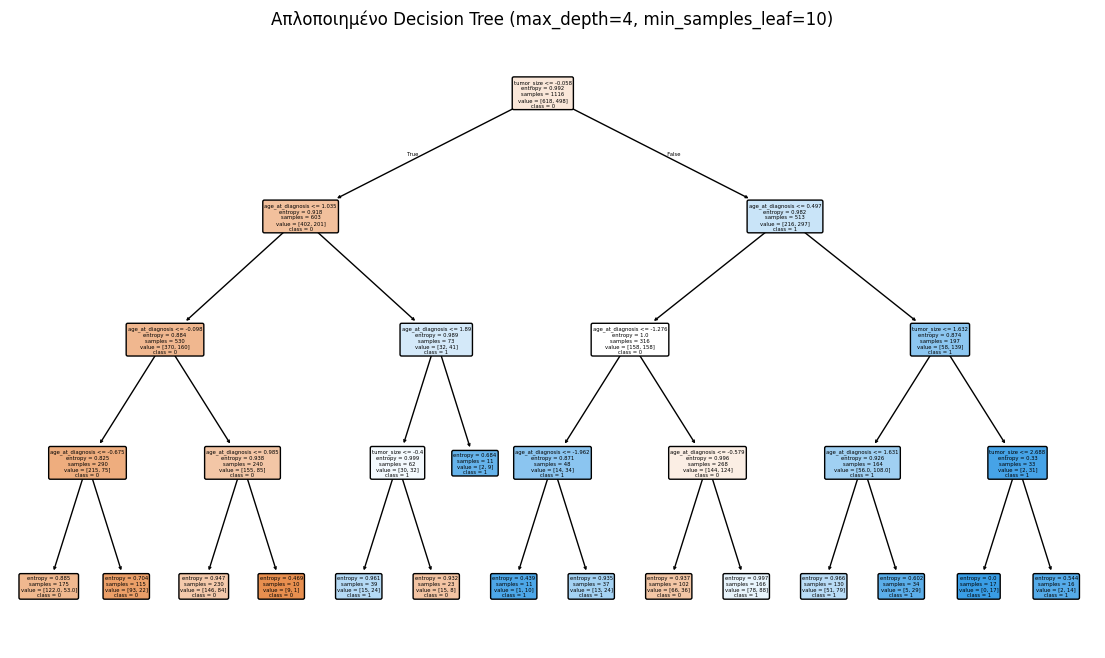

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. Προετοιμασία δεδομένων ---
X = subset_filtered[['age_at_diagnosis', 'tumor_size']]
y = subset_filtered['died_of_cancer_bin']

# --- 2. Split σε training/test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 3. Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Απλοποιημένο Decision Tree ---
decTreeClf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    min_samples_leaf=10,
    random_state=42
)
decTreeClf.fit(X_train_scaled, y_train)

# --- 5. Πρόβλεψη και Αξιολόγηση ---
y_pred = decTreeClf.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- 6. Οπτικοποίηση Δέντρου ---
plt.figure(figsize=(14, 8))
plot_tree(
    decTreeClf,
    feature_names=['age_at_diagnosis', 'tumor_size'],
    class_names=[str(c) for c in decTreeClf.classes_],
    filled=True,
    rounded=True
)
plt.title("Απλοποιημένο Decision Tree (max_depth=4, min_samples_leaf=10)")
plt.show()


Για την πρόβλεψη του αν μια ασθενής πέθανε από καρκίνο (μεταβλητή died_of_cancer_bin), εφαρμόστηκε ταξινόμηση με δέντρο απόφασης (Decision Tree Classifier), χρησιμοποιώντας ως χαρακτηριστικά την ηλικία κατά τη διάγνωση (age_at_diagnosis) και το μέγεθος του όγκου (tumor_size). Αρχικά, τα δεδομένα κανονικοποιήθηκαν με StandardScaler και χωρίστηκαν σε training και test set (80%-20%). Το αρχικό δέντρο χωρίς περιορισμούς αποδείχθηκε υπερβολικά μεγάλο και πολύπλοκο, υποδηλώνοντας πιθανό υπερεφαρμογή (overfitting). Για τον λόγο αυτό, εφαρμόστηκε απλοποίηση με υπερπαραμέτρους max_depth=4 και min_samples_leaf=10, δημιουργώντας ένα πιο ερμηνεύσιμο και συμπαγές μοντέλο.

Η τελική απόδοση στο test set ήταν 61% ακρίβεια, με precision=49%, recall=55% και f1-score=52% για την κατηγορία "πέθανε από καρκίνο". Το μοντέλο καταφέρνει να διαχωρίσει σε κάποιον βαθμό τις δύο κατηγορίες, αλλά η απόδοσή του είναι μέτρια.

Πιθανή βελτίωση θα μπορούσε να επιτευχθεί με χρήση επιπλέον χαρακτηριστικών.

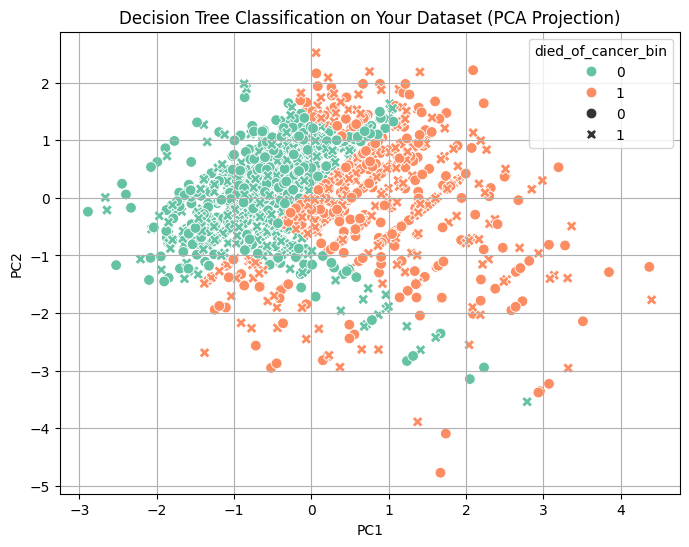

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA για οπτικοποίηση (2 διαστάσεων)
X_vis = pca.fit_transform(scaler.transform(X_all))

# Προβλέψεις σε όλο το dataset
y_all_pred = decTreeClf.predict(scaler.transform(X_all))

# Σχεδιάζουμε τις προβλέψεις και τις πραγματικές κλάσεις
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_all_pred, style=y, palette='Set2', s=60)
plt.title('Decision Tree Classification (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


Περιγραφή Γραφήματος PCA και Απόδοσης Decision Tree

Για την οπτικοποίηση της απόδοσης του μοντέλου, εφαρμόστηκε PCA (Principal Component Analysis) με σκοπό τη μείωση των διαστάσεων σε 2 κύριες συνιστώσες. Στο παραγόμενο διάγραμμα παρουσιάζονται οι προβλέψεις του δέντρου απόφασης με χρωματική κωδικοποίηση (ανάλογα με την προβλεπόμενη κατηγορία) και μορφοποίηση των σημείων (ανάλογα με την πραγματική τιμή της μεταβλητής died_of_cancer_bin).

Παρατηρείται ότι το μοντέλο καταφέρνει να διαχωρίσει κάποιες περιοχές του χώρου χαρακτηριστικών, αλλά υπάρχουν και πολλές περιοχές αλληλοεπικάλυψης μεταξύ των δύο κατηγοριών. Αυτό επιβεβαιώνει τα μέτρια ικανοποιητικά αποτελέσματα του classification report και της confusion matrix (accuracy ~61%).

Η οπτικοποίηση βοηθά στο να εντοπίσουμε περιοχές όπου το μοντέλο έχει σύγχυση μεταξύ των δύο τάξεων, κάτι που θα μπορούσε να βελτιωθεί με περισσότερα χαρακτηριστικά.

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_clf.fit(X_train_scaled, y_train)


y_pred = svm_clf.predict(X_test_scaled)


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.68      0.80      0.73       172
           1       0.56      0.41      0.47       108

    accuracy                           0.65       280
   macro avg       0.62      0.60      0.60       280
weighted avg       0.63      0.65      0.63       280



Για τη βελτίωση της επίδοσης στο πρόβλημα δυαδικής ταξινόμησης, δοκιμάστηκε επίσης ο αλγόριθμος SVM με RBF kernel. Το μοντέλο εκπαιδεύτηκε χρησιμοποιώντας τα ίδια χαρακτηριστικά (age_at_diagnosis, tumor_size) και συγκρίθηκε με το δέντρο απόφασης.

Το classification report για το test set έδειξε τα εξής αποτελέσματα:

Ακρίβεια (accuracy): 65%

Precision για κλάση 0 (δεν πέθανε από καρκίνο): 0.68

Recall για κλάση 0: 0.80

Precision για κλάση 1 (πέθανε από καρκίνο): 0.56

Recall για κλάση 1: 0.41

Από τα αποτελέσματα παρατηρούμε ότι το μοντέλο ταξινομεί καλύτερα τα άτομα που δεν πέθαναν από καρκίνο (κλάση 0), με υψηλό recall 0.80. Αντίθετα, η επίδοση στην κλάση 1 είναι πιο περιορισμένη, γεγονός που δείχνει ότι το μοντέλο δυσκολεύεται να εντοπίσει σωστά τα άτομα που πέθαναν από καρκίνο.

Σε σύγκριση με το Decision Tree, το Support Vector Machine παρουσιάζει ελαφρώς καλύτερη γενική απόδοση, γεγονός που πιθανώς οφείλεται στην ικανότητά του να δημιουργεί πιο σύνθετα όρια απόφασης στον χώρο χαρακτηριστικών.

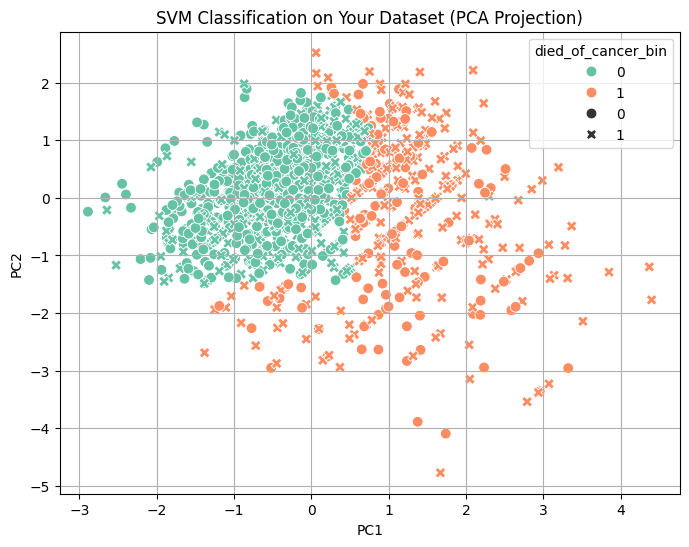

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA για οπτικοποίηση
pca = PCA(n_components=2)
X_vis = pca.fit_transform(scaler.transform(X_all))

# Προβλέψεις σε όλο το dataset
y_all_pred = svm_clf.predict(scaler.transform(X_all))

# Σχεδιάζουμε προβλέψεις και πραγματικές κλάσεις
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_all_pred, style=y_all, palette='Set2', s=60)
plt.title('SVM Classification on Your Dataset (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


Για καλύτερη κατανόηση της συμπεριφοράς του μοντέλου SVM, εφαρμόστηκε PCA (Principal Component Analysis) για τη μείωση των διαστάσεων των δεδομένων σε 2 συνιστώσες, προκειμένου να απεικονιστούν οι προβλέψεις του μοντέλου και η πραγματική κλάση των παρατηρήσεων.

Στο παραπάνω γράφημα:

Το χρώμα δείχνει την πρόβλεψη του μοντέλου SVM (0 ή 1)

Το σχήμα του δείκτη (στρογγυλό ή σταυρός) δείχνει την πραγματική τιμή της κλάσης

Από την απεικόνιση φαίνεται ότι:

Το SVM μοντέλο δημιουργεί καλό διαχωρισμό ανάμεσα στις δύο κλάσεις, ιδιαίτερα στον κεντρικό πυρήνα των δεδομένων.

Ωστόσο, στις περιοχές όπου υπάρχει επικάλυψη των δύο κλάσεων, το μοντέλο δυσκολεύεται να ταξινομήσει σωστά, όπως φαίνεται από τα σφάλματα ταξινόμησης (π.χ. πορτοκαλί σημεία με σχήμα "0").

Η απεικόνιση αυτή δείχνει ξεκάθαρα την ικανότητα του SVM να δημιουργεί πιο ευέλικτα όρια απόφασης σε σύγκριση με το Decision Tree, αλλά και τους περιορισμούς του σε περιοχές με έντονη επικάλυψη των κλάσεων.

Για να εξετάσουμε την απόδοση ενός μη γραμμικού μοντέλου, εφαρμόζουμε ένα τεχνητό νευρωνικό δίκτυο (Artificial Neural Network).

Το δίκτυο αποτελείται από ένα κρυφό επίπεδο με 10 νευρώνες και χρησιμοποιεί backpropagation για την εκπαίδευση.

In [ ]:
from sklearn.neural_network import MLPClassifier

# Δημιουργία νευρωνικού με 1 κρυφό layer 10 νευρώνων
ann = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
ann.fit(X_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)

In [ ]:
y_pred = ann.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.75      0.72       172
           1       0.54      0.47      0.50       108

    accuracy                           0.64       280
   macro avg       0.62      0.61      0.61       280
weighted avg       0.64      0.64      0.64       280

[[129  43]
 [ 57  51]]


Αξιολόγηση Νευρωνικού Δικτύου (MLPClassifier)
Το τεχνητό νευρωνικό δίκτυο εμφάνισε μέτρια συνολική επίδοση, με accuracy περίπου 64%.

Κλάση 0 (πιθανώς "ζωντανός"):

Precision: 0.69

Recall: 0.75

F1-score: 0.72
Το μοντέλο καταφέρνει ικανοποιητικά να αναγνωρίσει τα δείγματα της κλάσης αυτής, με σχετικά υψηλή ακρίβεια και επαναληψιμότητα.

Κλάση 1 (πιθανώς "πέθανε από καρκίνο"):

Precision: 0.54

Recall: 0.47

F1-score: 0.50
Εδώ η απόδοση είναι χαμηλότερη. Το μοντέλο χάνει αρκετά από τα δείγματα αυτής της κατηγορίας, γεγονός που φαίνεται και στον πίνακα σύγχυσης (υψηλός αριθμός false negatives).

Παρακολούθηση της Εκπαίδευσης Νευρωνικού Δικτύου μέσω Καμπύλης Απώλειας
Για να κατανοήσουμε καλύτερα τη διαδικασία εκπαίδευσης του νευρωνικού δικτύου (MLP), δημιουργήθηκε μοντέλο με την παράμετρο warm_start=True, ώστε να πραγματοποιείται εκπαίδευση σε 1000 διαδοχικές εποχές (epochs). Σε κάθε εποχή καταγράφηκε η απώλεια (log loss) για το σετ εκπαίδευσης (train) και το σετ δοκιμής (test).

Η καμπύλη απώλειας που προέκυψε δείχνει την απόδοση του μοντέλου καθώς μαθαίνει:

Η απώλεια στο train set μειώνεται σταδιακά, γεγονός που δείχνει ότι το μοντέλο προσαρμόζεται στα δεδομένα εκπαίδευσης.

Η απώλεια στο test set μειώνεται αρχικά, αλλά μετά από κάποιο σημείο ενδέχεται να σταθεροποιείται ή να αυξάνεται ελαφρώς, κάτι που πιθανόν υποδεικνύει αρχή υπερπροσαρμογής (overfitting).

Αν παρατηρείται μεγάλη απόκλιση μεταξύ train και test απώλειας στο τέλος, αυτό σημαίνει ότι το μοντέλο έχει προσαρμοστεί υπερβολικά στα δεδομένα εκπαίδευσης και δεν γενικεύει καλά σε νέα δεδομένα.

Η οπτικοποίηση της καμπύλης προσφέρει πολύτιμη πληροφορία για τη βελτιστοποίηση του μοντέλου — π.χ. τον ιδανικό αριθμό εποχών ή την ανάγκη για regularization.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691

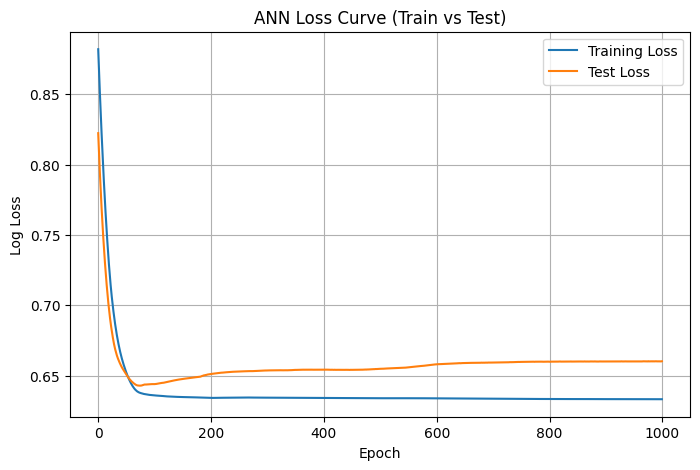

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# 1. Χαρακτηριστικά & target
features = ['age_at_diagnosis', 'tumor_size']
X = subset_filtered[features]
y = subset_filtered['died_of_cancer_bin']  # binary target

# 2. Split σε train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Δημιουργία MLP με warm_start για σταδιακή εκπαίδευση
ann = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1, warm_start=True, random_state=42, verbose=False)

train_losses = []
test_losses = []
epochs = 1000

for epoch in range(epochs):
    ann.fit(X_train_scaled, y_train)
    y_train_prob = ann.predict_proba(X_train_scaled)
    y_test_prob = ann.predict_proba(X_test_scaled)

    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))

# 5. Οπτικοποίηση της καμπύλης απώλειας
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('ANN Loss Curve (Train vs Test)')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()


Ανάλυση Καμπύλης Απώλειας
Από την παρακάτω καμπύλη παρατηρείται ότι:

Το μοντέλο επιτυγχάνει σημαντική μείωση της απώλειας (log loss) στις πρώτες 50–100 εποχές.

Η απώλεια στο σετ εκπαίδευσης (training loss) παραμένει σταθερή σε χαμηλό επίπεδο μετά τις 100 εποχές.

Ωστόσο, η απώλεια στο σετ δοκιμής (test loss) παρουσιάζει μικρή αύξηση μετά από αυτό το σημείο, ένδειξη ότι το μοντέλο αρχίζει να υπερπροσαρμόζεται στα δεδομένα εκπαίδευσης.

Αυτό το φαινόμενο υπερπροσαρμογής μειώνει τη γενίκευση του μοντέλου και δείχνει ότι ένας μικρότερος αριθμός εποχών (π.χ. 100–150) ίσως είναι πιο κατάλληλος για να επιτυγχάνεται η καλύτερη απόδοση στο test set.

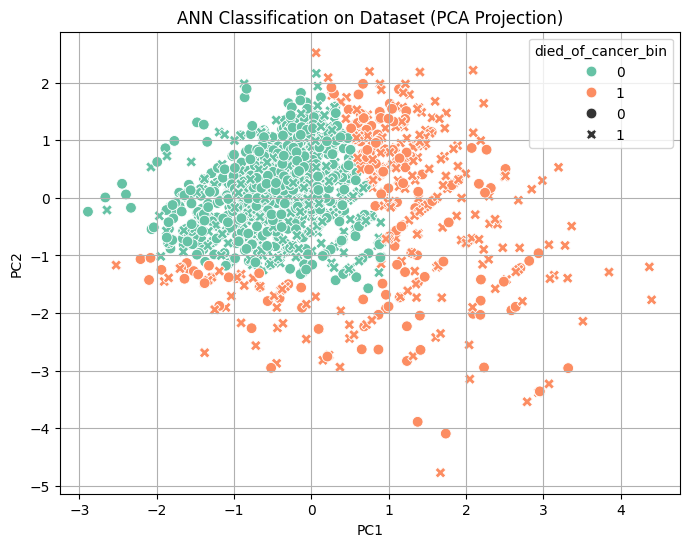

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Συνδυάζουμε όλα τα δεδομένα (train + test)
X_all = subset_filtered[features]
y_all = subset_filtered['died_of_cancer_bin']

# PCA για οπτικοποίηση (στο scaled σύνολο)
X_all_scaled = scaler.transform(X_all)
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_all_scaled)

# Προβλέψεις σε όλο το dataset
y_all_pred = ann.predict(X_all_scaled)  # ή svm_clf.predict(...), όποιο μοντέλο έχεις

# Οπτικοποίηση με πραγματικές και προβλεπόμενες κλάσεις
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=y_all_pred, style=y_all, palette='Set2', s=60)
plt.title('ANN Classification on Dataset (PCA Projection)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


Οπτικοποίηση Προβλέψεων με PCA

Για καλύτερη κατανόηση της απόδοσης του νευρωνικού δικτύου, εφαρμόστηκε Ανάλυση Κυρίων Συνιστωσών (PCA) στα δύο χαρακτηριστικά (age_at_diagnosis, tumor_size) προκειμένου να μειωθεί η διάσταση των δεδομένων και να καταστεί δυνατή η οπτική απεικόνιση των προβλέψεων.

Η παρακάτω γραφική παράσταση παρουσιάζει όλα τα δείγματα του dataset στις δύο πρώτες κύριες συνιστώσες. Στο διάγραμμα:

Το χρώμα των σημείων αντιστοιχεί στην πρόβλεψη του νευρωνικού δικτύου (ANN).

Το σχήμα του σημείου (κυκλάκι ή Χ) δηλώνει την πραγματική κλάση:

Κλάση 0 (πιθανώς "ζωντανός") = κύκλος

Κλάση 1 (πιθανώς "πέθανε από καρκίνο") = Χ

Παρατηρείται ότι το μοντέλο διαχωρίζει ικανοποιητικά τα περισσότερα δείγματα, ωστόσο υπάρχει αλληλοεπικάλυψη μεταξύ των δύο κλάσεων, ιδιαίτερα στο μεταβατικό σημείο μεταξύ των δύο συστάδων. Αυτό οδηγεί σε λάθη ταξινόμησης, κυρίως με τη μορφή false negatives (δείγματα της κλάσης 1 που ταξινομήθηκαν ως 0), γεγονός που επιβεβαιώνεται και από τη χαμηλή recall για την κλάση 1 (0.47).

Η PCA δεν επηρεάζει την εκπαίδευση του μοντέλου αλλά βοηθά σημαντικά στην οπτική αξιολόγηση της "ικανότητας διαχωρισμού" του μοντέλου στον συγκεκριμένο χώρο χαρακτηριστικών.


Συμπέρασμα:

Η παραπάνω εργασία έδειξε ότι το μέγεθος του όγκου σχετίζεται ισχυρά με την επιβίωση των ασθενών, καθώς υψηλότερες τιμές συνδέονται με αυξημένη πιθανότητα θανάτου. Αντίθετα, η ηλικία κατά τη διάγνωση παρουσιάζει ασθενέστερη, αλλά όχι αμελητέα, συσχέτιση με την έκβαση της νόσου, με τους πιο ηλικιωμένους ασθενείς να έχουν κατά μέσο όρο χειρότερη πρόγνωση.

Η χρήση αλγορίθμων κατηγοριοποίησης (K-Means, Hierarchical Clustering) σε συνδυασμό με PCA ανέδειξε την ύπαρξη διακριτών υποομάδων ασθενών με πιθανές κλινικές ή βιολογικές διαφοροποιήσεις, που όμως δεν εμφάνιζαν τον καλύτερο δυνατό διαχωρισμό. Ίσως αν συμπεριλαμβάνονταν και άλλοι παράγοντες, όπως αριθμός θετικών λεμφαδένων, το status HER2, ο διαχωρισμός να ήταν πιο σαφής.

Τέλος, εξετάστηκε η δυνατότητα πρόβλεψης της έκβασης της νόσου με Decision Tree, SVM και Τεχνητό Νευρωνικό Δίκτυο (ANN), με το ANN να εμφανίζει την καλύτερη απόδοση. Παρόλ'αυτά δεν ήταν η αναμενόμενη απόδοση.

Συνολικά, τα ευρήματα ενισχύουν την αξία των παραμέτρων μεγέθους του όγκου και της ηλικίας της διάγνωσης ως προγνωστικών δεικτών επιβίωσης και παρέχουν μία βάση για περαιτέρω ανάλυση με τη χρήση περισσότερων μεταβλητών του dataset.